In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import collections
import numpy as np
from sklearn.datasets import make_blobs
#import umap.umap_ as umap
from seirsplus.models import *
from seirsplus.networks import *
import statistics
import seir
from seir_experiments import * 
import statistics

In [2]:
def ipfnB(G1,s=10000,e=1,i=1):
#s = no of points
    SIGMA  = 1/5.2
    GAMMA  = 1/10
    MU_I   = 0.002
    
    R0     = 2.5
    BETA   = 1/(1/GAMMA) * R0
    BETA_Q = 0.5*BETA

    P      = 0.2
    Q      = 0.05
    
    E=s*e/100
    I=s*i/100
    
    model_base = SEIRSNetworkModel(G       = G1, 
                          beta    = BETA, 
                          sigma   = SIGMA, 
                          gamma   = GAMMA, 
                          initE = E, initI = I)
    
    model_base.run(T=300)
    fig,axs = model_base.figure_basic()
    
    line = axs.lines[1]
    p = line.get_data()
    p0 = p[0].compressed()
    p1 = p[1].compressed()
    #Maximum
    m = max(p[1])
    #Days Max
    ind= numpy.argmax(p[1])
    d = p[0][numpy.argmax(p[1])]
    #Mean and St Deviation
    mean  = statistics.mean(p1)
    stdev =  statistics.stdev(p1)
    line1 = axs.lines[2]
    w = line1.get_data()
    #Total Infections
    tot = 1 -(w[1][w[1].shape[0]-1])
    tp = 0.3*m
    np = 0.9*m
    #Thirty Percent
    tplfh =[]
    tplsh = []
    for i in range(ind):
        x = numpy.abs(p1[i]-tp)
        if(x<0.001):
            #print(p1[i],x,p0[i])
            tplfh.append(p0[i])
    for i in range(ind, len(p1)):
        x = numpy.abs(p1[i]-tp)
        if(x<0.001):
            #print(p1[i],x,p0[i])
            tplsh.append(p0[i])
    tpl= (statistics.mean(tplsh)) - (statistics.mean(tplfh)) 
    #Ninety Percent
    nplfh =[]
    nplsh = []
    for i in range(ind):
        x = numpy.abs(p1[i]-np)
        if(x<0.001):
            #print(p1[i],x,p0[i])
            nplfh.append(p0[i])
    for i in range(ind, len(p1)):
        x = numpy.abs(p1[i]-np)
        if(x<0.001):
            #print(p1[i],x,p0[i])
            nplsh.append(p0[i])
    npl=(statistics.mean(nplsh)) - (statistics.mean(nplfh)) 
    
    
    return [m,d,tot,tpl,npl],p

In [3]:
def calc_euclid(x,y):
    dist = sum((x-y)**2)

    return dist

In [4]:
def plot_degree_dist(min_degree, mean_degree, gammas):
    
    N=10000
    fig, ax = plt.subplots()
    deg_list=[]
    for gamma in gammas:
        degs = generate_power_law_degrees(N, min_degree, mean_degree, gamma)
        # Degree histogram
        ax = sns.distplot(degs, kde=False, label=gamma, ax=ax)
        # hist_kws={'alpha':0.2}, bins=np.arange(0, 1200, 20),
        deg_list.append(degs)
    ax.set_yscale('log')
    ax.set_xlabel('Degree')
    ax.set_ylabel('Number of nodes')
    ax.legend(title='gamma')
    ax.set_title(f'Degree distribution (log scale) for N={N} nodes, mean={mean_degree}')
    print(np.median(degs), np.sort(degs)[-int(0.001 * N)])  # (median, top 0.1%)
    return ax,deg_list

In [ ]:
g1  = seir.generate_scale_free_graph(10000,min_degree=2,mean_degree=20,gamma=0.2)
g1 = nx.Graph(g1)

t = 0.00
t = 10.01
t = 20.00
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.04
t = 100.01
t = 110.05
t = 120.03
t = 130.16
t = 140.51
t = 150.29
t = 160.10
t = 170.16
t = 190.09


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


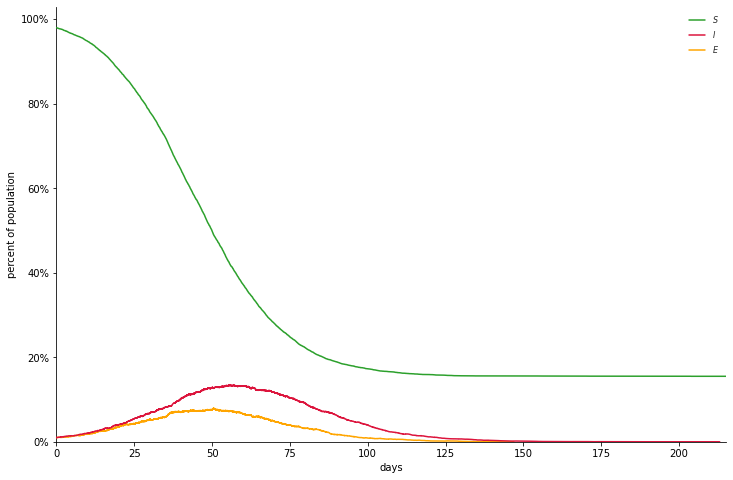

In [16]:
res1,line1 = ipfnB(g1,e=1,i=1)

In [ ]:
g2 = nx.barabasi_albert_graph(10000,m=10)

In [17]:
res2,line2 = ipfnB(g2,e=1,i=1)

t = 0.08
t = 10.02
t = 20.00


KeyboardInterrupt: 

In [9]:
with open('Final Outputs/Loc_BA_Ofir_Graphs.pkl', 'rb') as infile:
    graphs = pickle.load(infile)

In [10]:
g1=graphs[0]
g2=graphs[1]

In [7]:
#Sort Key
def mykey(x):
    return(x[0])

In [49]:
#Sort Key
def mykey1(x):
    return(x[1])

In [ ]:
deg=g1.degree()

In [12]:
deg[7]

15

In [8]:
s = 10000
data1,y1 = make_blobs(n_samples=s,n_features=2,cluster_std=3)

## Saving Distances
distances [len(data1)xlen(data1)x2] <br/>
distances[ i ] : All distances and indices from node 'i' <br/> 
distances[ i ][ j ] : [ dist, j ] <br/> 
dist :  Distance from node 'i' to node 'j'

In [9]:
distances =[]
for i in range(len(data1)):
    dlist=[]
    for j in range(len(data1)):
        diff = calc_euclid(data1[i],data1[j])
        dlist.append([diff,j])
    distances.append(dlist)

## File Saved for further use

In [10]:
import pickle
with open('Final Outputs/Scatter_Data_10k.pkl', 'wb') as outfile:
    pickle.dump(data1, outfile, pickle.HIGHEST_PROTOCOL)

In [11]:
with open('Final Outputs/Distances_10k.pkl', 'wb') as outfile:
    pickle.dump(distances, outfile, pickle.HIGHEST_PROTOCOL)

In [5]:
with open('Final Outputs/Scatter_Data_10k.pkl', 'rb') as infile:
    data1 = pickle.load(infile)

In [6]:
with open('Final Outputs/Distances_10k.pkl', 'rb') as infile:
    distances = pickle.load(infile)

In [16]:
x = distances[20]
x.sort(key=mykey)

x[23][1]

114

In [13]:
##Old Function
g3=nx.Graph()
g3.add_nodes_from(range(10000))
for i in range(len(data1)):

    dlist=[]
    for j in range(len(data1)):
        diff = calc_euclid(data1[i],data1[j])
        dlist.append([diff,j])
    dlist.sort(key=mykey)
    #print(dlist[:20])
    edgelist=[]
    cntr= 0
    p=1
    while(cntr!=deg[i] and p<10000):
    #for k in range(deg[i]):
        k= dlist[p][1]
        if(g3.degree[k]<deg[j]):
            edgelist.append((i,k))
            cntr=cntr+1
        p=p+1

    g3.add_edges_from(edgelist)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [23]:
## NewFunction
g3=nx.Graph()
g3.add_nodes_from(range(10000))
for i in range(len(data1)):

    dlist=distances[i]
    dlist.sort(key=mykey)
    #print(dlist[:20])
    edgelist=[]
    cntr= 0
    p=1
    while(cntr!=deg[i] and p<10000):
    #for k in range(deg[i]):
        k= dlist[p][1]
        if(g3.degree[k]<deg[k]):
            edgelist.append((i,k))
            cntr=cntr+1
        p=p+1

    g3.add_edges_from(edgelist)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [38]:
dlist=[]
for i in range(len(data1)):
        diff = calc_euclid(data1[i],data1[64])
        dlist.append(diff)

In [39]:
statistics.pstdev(dlist)

129.90656591754353

In [31]:
def mykey2(x):
    y=[]
    for i in x:
        y.append(i[0])
    return(y)

In [23]:
x= [4,5,6,7,8,9]
y=[]
z=[]

print(y)
print(z)

[4, 5]
[6, 7, 8, 9]


In [35]:
y =mykey2(distances[9])
statistics.pstdev(y)

91.03157713369323

In [53]:
deg1 = np.asarray(deg).tolist()
deg1.sort(key=mykey1,reverse=True)
deg1[0][1]

397

In [55]:
g4=nx.Graph()
g4.add_nodes_from(range(10000))
for i in range(len(data1)):
    dlist=distances[i]
    coll = mykey2(dlist)
    sd = statistics.pstdev(coll)
    dlist.sort(key=mykey)
    dlist1=[]
    dlist2=[]
    for r in dlist:
        if(r[1]<sd):
            dlist1.append(r)
        elif(r[1]<(2*sd)):
            dlist2.append(r)
    edgelist=[]
    cntr= 0
    p=1
    deg1 = np.asarray(deg).tolist()
    deg1.sort(key=mykey1,reverse=True)
    m = deg1[i][1]
    fsd = int(0.66*m)
    ssd = m-fsd
    while(cntr!=fsd and p<len(dlist1)):
    #for k in range(deg[i]):
        k= dlist1[p][1]
        if(g4.degree[k]<deg[k]):
            edgelist.append((i,k))
            cntr=cntr+1
        p=p+1

    cntr = 0
    while(cntr!=ssd and p<len(dlist2)):
    #for k in range(deg[i]):
        k= dlist2[p][1]
        if(g4.degree[k]<deg[k]):
            edgelist.append((i,k))
            cntr=cntr+1
        p=p+1

    g4.add_edges_from(edgelist)
    #print(i)

In [56]:
g4.number_of_edges()

3292

In [24]:
graphs=[g1,g2,g3]

In [25]:
import pickle
with open('Final Outputs/Loc_BA_Ofir_Graphs.pkl', 'wb') as outfile:
    pickle.dump(graphs, outfile, pickle.HIGHEST_PROTOCOL)

t = 0.03
t = 10.01
t = 20.01
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.00
t = 100.00
t = 110.02
t = 120.00
t = 130.02
t = 140.04
t = 150.07
t = 160.00
t = 170.88
t = 180.21


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


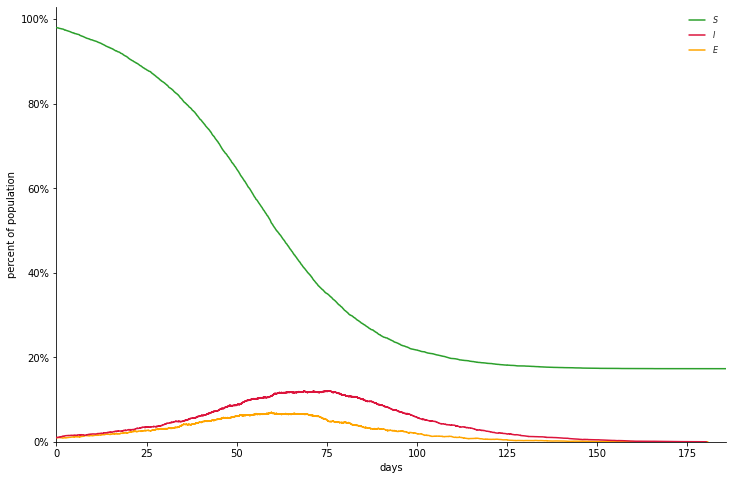

t = 0.01
t = 10.01
t = 20.00
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.02
t = 100.02
t = 110.00
t = 120.02
t = 130.01
t = 140.38
t = 150.44
t = 160.43


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


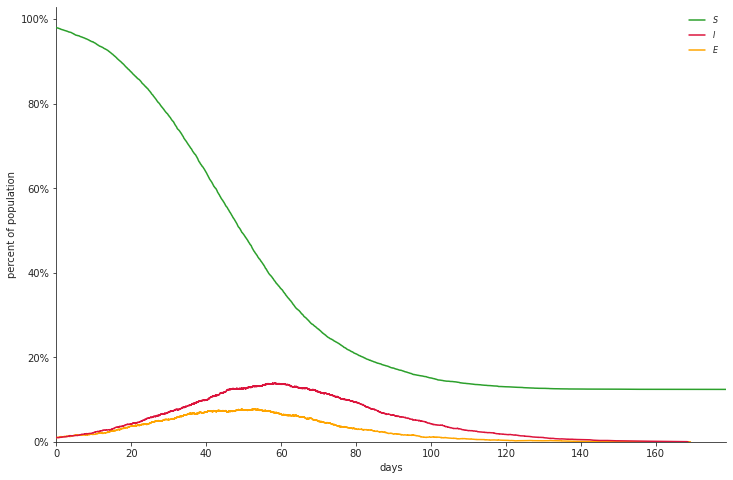

t = 0.03
t = 10.02
t = 20.01
t = 30.00
t = 40.01
t = 50.00
t = 60.00
t = 70.01
t = 80.00
t = 90.00
t = 100.00
t = 110.00
t = 120.00
t = 130.00
t = 140.35
t = 150.31
t = 160.03
t = 170.47
t = 180.95
t = 200.71
t = 220.13


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


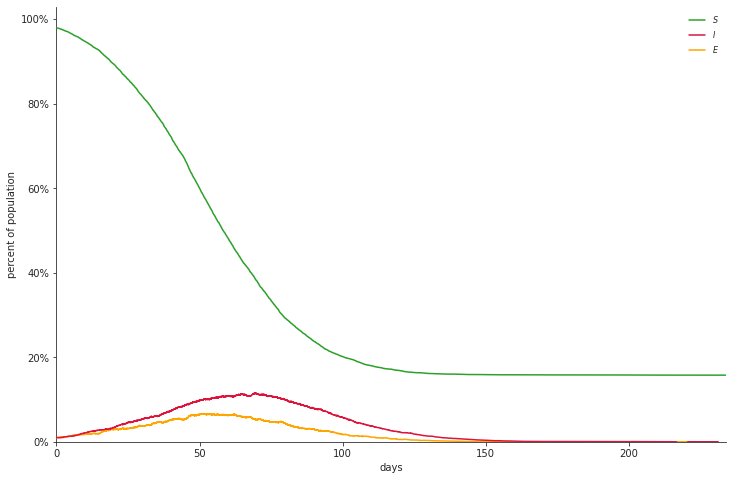

t = 0.03
t = 10.01
t = 20.00
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.02
t = 80.00
t = 90.00
t = 100.01
t = 110.00
t = 120.03
t = 130.06
t = 140.00
t = 160.19


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


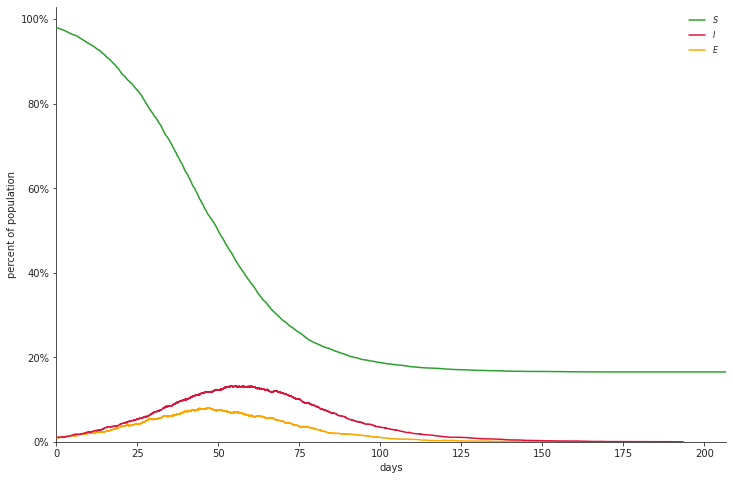

t = 0.00
t = 10.01
t = 20.01
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.01
t = 80.00
t = 90.00
t = 100.00
t = 110.01
t = 120.05
t = 130.00
t = 140.07
t = 150.27
t = 160.26
t = 170.36
t = 190.57


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


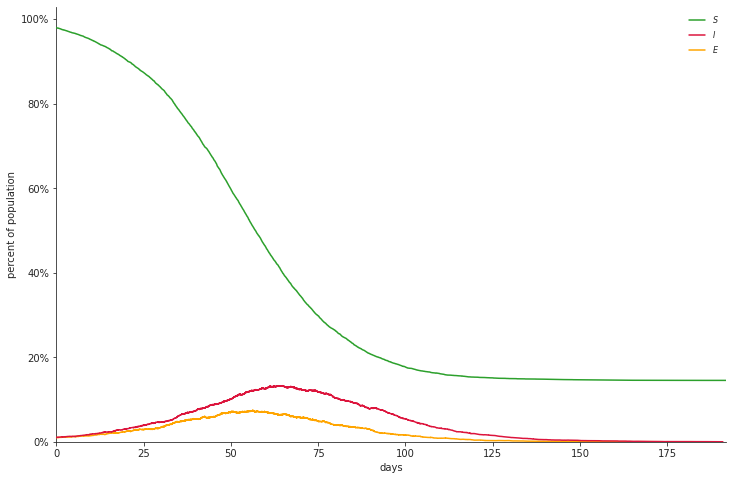

t = 0.01
t = 10.01
t = 20.00
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.01
t = 80.01
t = 90.00
t = 100.01
t = 110.02
t = 120.07
t = 130.01
t = 140.01
t = 150.01
t = 160.05
t = 180.62
t = 190.65
t = 200.15
t = 210.62


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


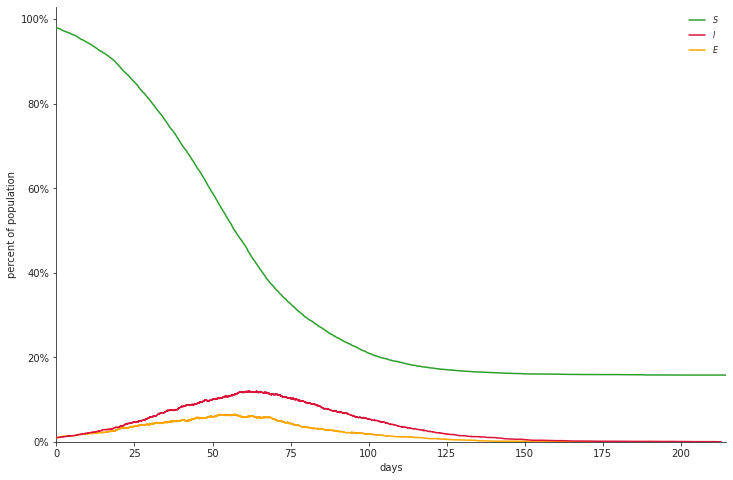

t = 0.01
t = 10.01
t = 20.01
t = 30.01
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.01
t = 90.00


KeyboardInterrupt: 

In [26]:
op1 = []
op2= []
op3 =[]
l1=[]
l2=[]
l3=[]
for i in range(10):
    res1,line1 = ipfnB(g1,e=1,i=1)
    res2,line2 = ipfnB(g2,e=1,i=1)
    res3,line3 = ipfnB(g3,e=1,i=1)
    op1.append(res1)
    op2.append(res2)
    op3.append(res3)
    l1.append(line1)
    l2.append(line2)
    l3.append(line3)


In [ ]:
import pickle
with open('Final Outputs/Loc_v_NonLoc_Outputs.pkl', 'wb') as outfile:
    pickle.dump([op1,op2,op3,l1,l2,l3], outfile, pickle.HIGHEST_PROTOCOL)

In [28]:
import pickle
with open('Final Outputs/Loc_v_NonLoc_Outputs.pkl', 'rb') as infile:
    outputs = pickle.load(infile)

In [29]:
[op1,op2,op3,l1,l2,l3]= outputs

In [30]:
op1

[[0.1198,
  67.65048416942416,
  0.8382000000000001,
  84.9287753097759,
  21.315583114032464],
 [0.1298, 63.408926072144375, 0.8348, 80.98930363556931, 14.203274504924202],
 [0.1337, 56.93042896706232, 0.8569, 82.88322851940907, 18.28527638713568],
 [0.1388, 60.94684494298616, 0.8696, 75.88821581423025, 25.498622034498077],
 [0.1346, 61.5972292520954, 0.8501, 79.5231804885766, 20.49785222824024],
 [0.1521, 56.44869122762721, 0.855, 73.76694211217844, 15.52811077259878],
 [0.141, 59.24694339693411, 0.8397, 73.82465940543494, 18.726335186182524],
 [0.1323, 56.48066902323625, 0.8396, 78.42180387171601, 19.581209818955372],
 [0.138,
  50.796371041611714,
  0.8412999999999999,
  75.30924775287977,
  18.97929366122265],
 [0.1318, 59.01770321449753, 0.8496, 79.80388012717877, 22.287388797188335]]

t = 0.01
t = 10.01
t = 20.01
t = 30.01
t = 40.00
t = 50.00
t = 60.01
t = 70.00
t = 80.00
t = 90.02
t = 100.00
t = 110.01
t = 120.00
t = 130.00
t = 140.02
t = 150.10
t = 160.76
t = 170.21
t = 180.11
t = 190.40
t = 200.43


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


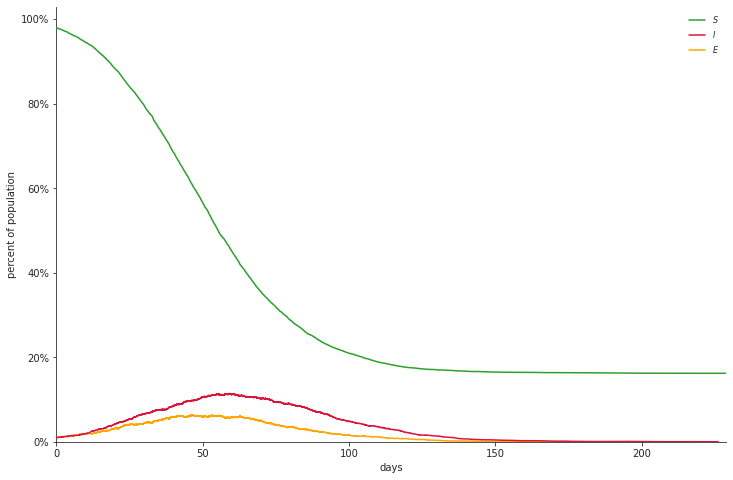

In [32]:
res3,line3 = ipfnB(g3,e=1,i=1)

In [33]:
res3

[0.1143, 58.99063669872026, 0.8379, 93.93700499478227, 20.95041369030465]

In [43]:
import matplotlib.font_manager

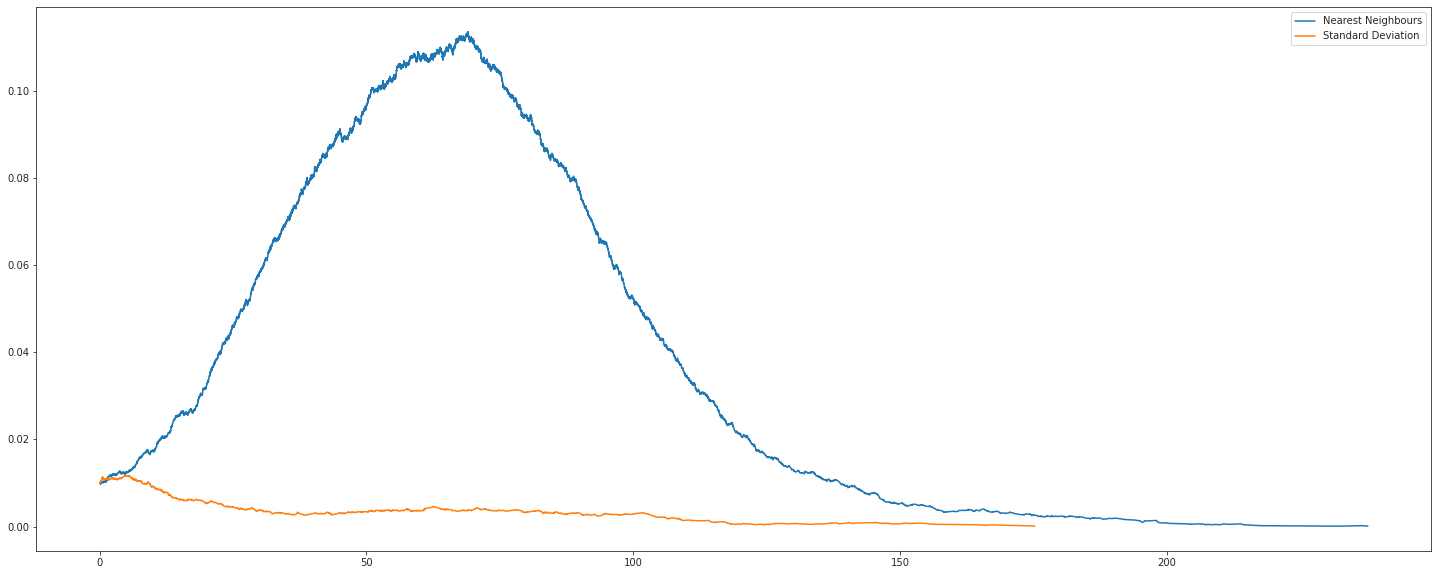

In [58]:
x3 = line3[0].compressed()
y3 = line3[1].compressed()
plt.plot(x3, y3, label = "Nearest Neighbours")

x4 = line4[0].compressed()
y4 = line4[1].compressed()
plt.plot(x4, y4, label = "Standard Deviation")

plt.legend()
plt.show()

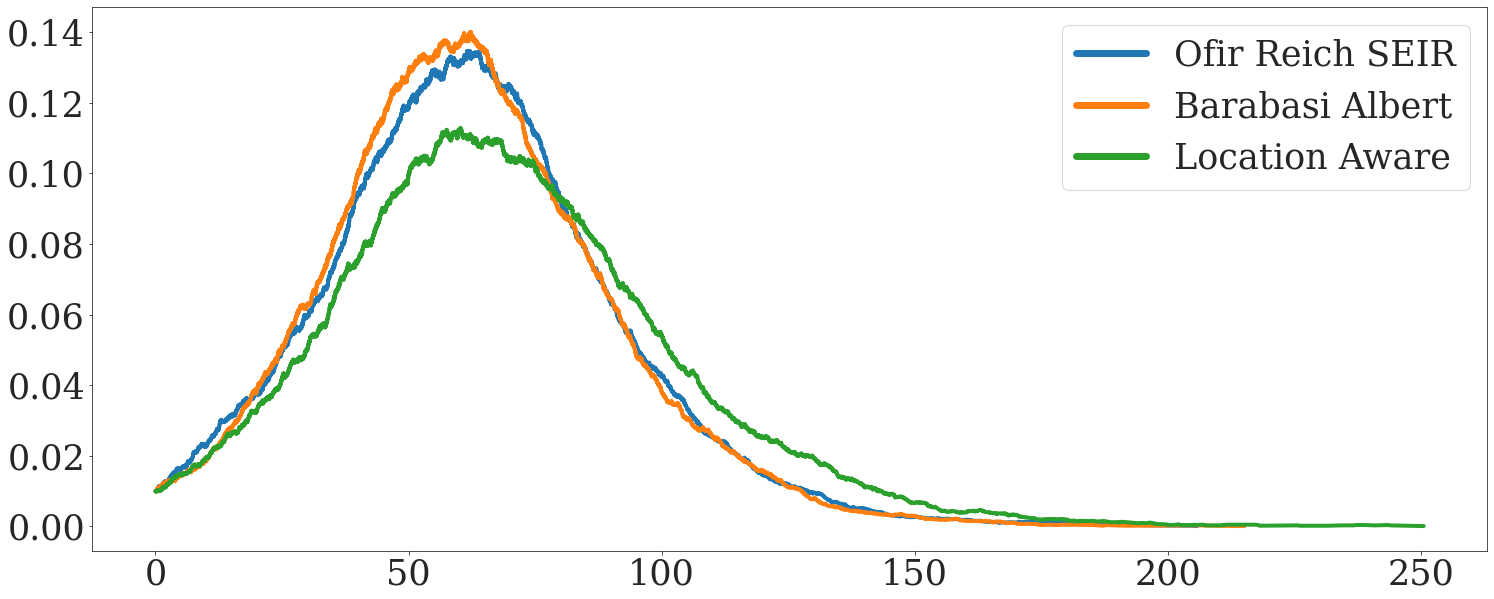

In [57]:
fig,ax =plt.subplots()
x1 = l1[4][0].compressed()
y1 = l1[4][1].compressed()
ax.plot(x1, y1, label = "Ofir Reich SEIR", linewidth=4)

x2 = l2[4][0].compressed()
y2 = l2[4][1].compressed()
ax.plot(x2, y2, label = "Barabasi Albert", linewidth=4)

x3 = l3[4][0].compressed()
y3 = l3[4][1].compressed()
ax.plot(x3, y3, label = "Location Aware", linewidth=4)

plt.yticks(fontsize=35)
plt.xticks(fontsize=35)
leg = plt.legend(prop = dict(size=35))
for legobj in leg.legendHandles:
    legobj.set_linewidth(7.0)
plt.show()

fig.savefig('op1.png')

In [45]:
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.sans-serif'] = ['sans-serif']

In [59]:
peak1 = []
dop1= []
tot1 = []
tp1=[]
np1=[]
for x in op1:
    peak1.append(x[0])
    dop1.append(x[1])
    tot1.append(x[2])
    tp1.append(x[3])
    np1.append(x[4])
    
peak2 = []
dop2= []
tot2 = []
tp2=[]
np2=[]
for x in op2:
    peak2.append(x[0])
    dop2.append(x[1])
    tot2.append(x[2])
    tp2.append(x[3])
    np2.append(x[4])
    
peak3 = []
dop3= []
tot3 = []
tp3=[]
np3=[]
for x in op3:
    peak3.append(x[0])
    dop3.append(x[1])
    tot3.append(x[2])
    tp3.append(x[3])
    np3.append(x[4])

In [60]:
peak = [peak1,peak2,peak3]
dop =[dop1,dop2,dop3]
tot = [tot1,tot2,tot3]
tp = [tp1,tp2,tp3]
np = [np1,np2,np3]

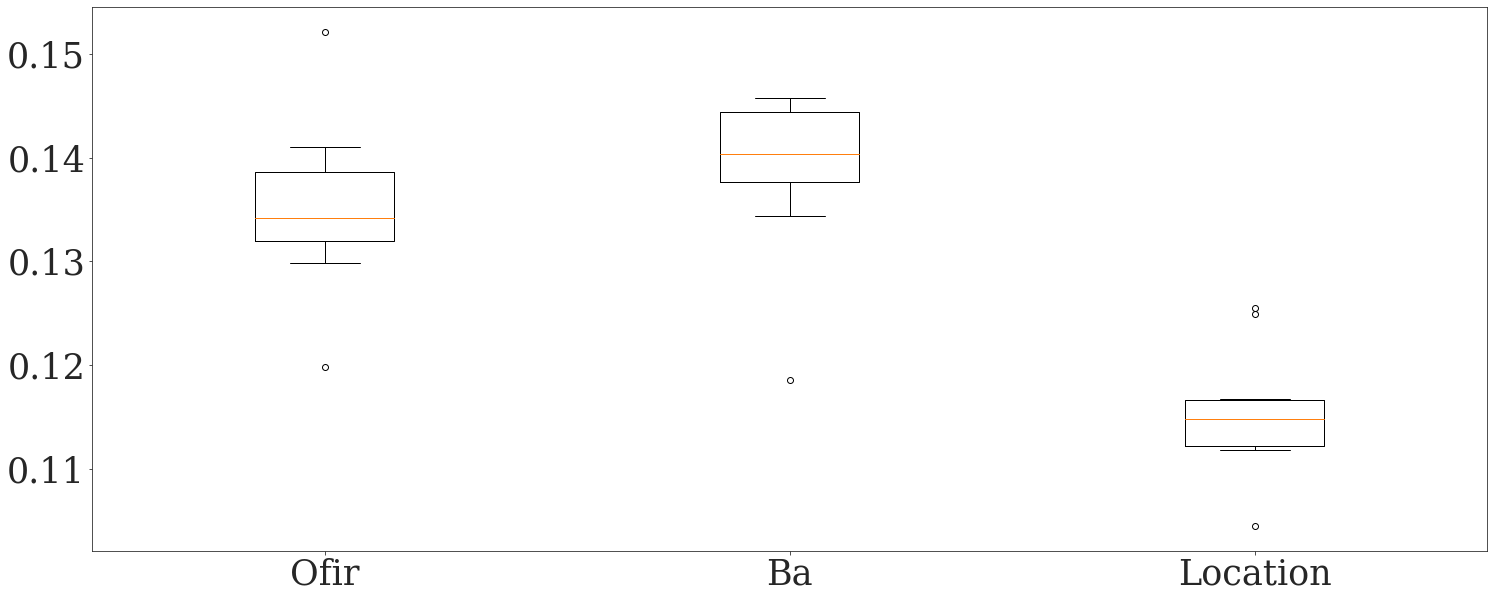

In [61]:
fig, ax = plt.subplots()

bp = ax.boxplot(peak,labels=['Ofir',"Ba",'Location'])
plt.yticks(fontsize=35)
plt.xticks(fontsize=35)

plt.show()

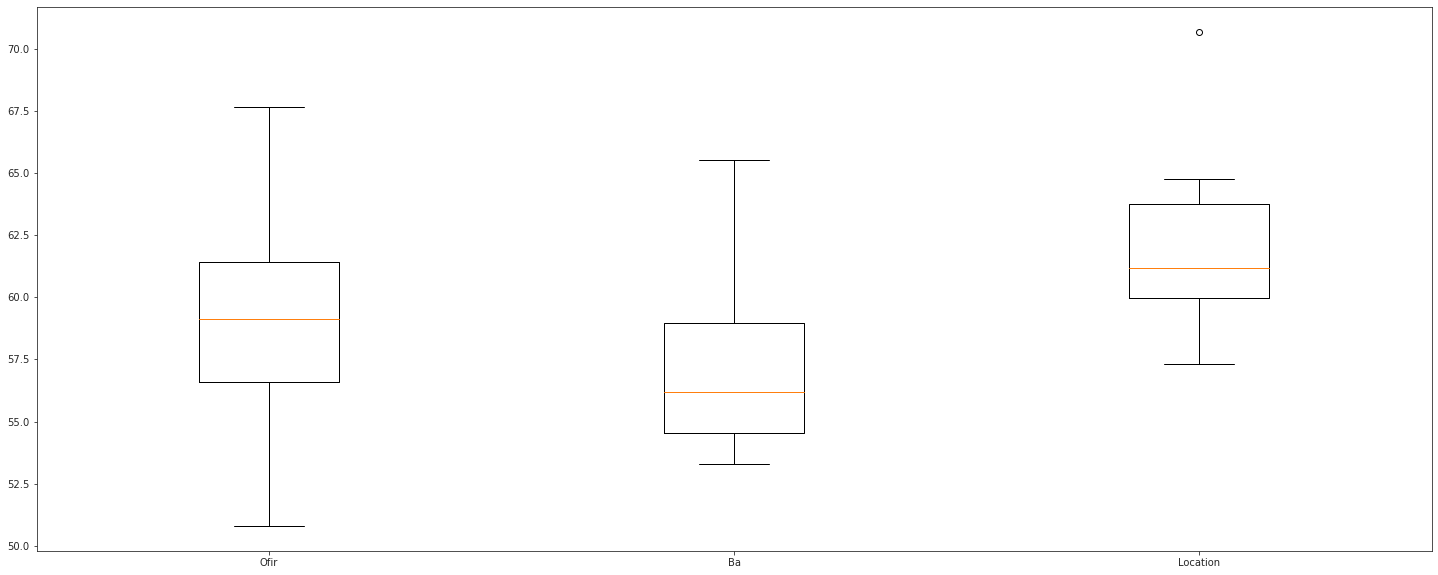

In [43]:
fig, ax = plt.subplots()

bp = ax.boxplot(dop,labels=['Ofir',"Ba",'Location'])

plt.show()

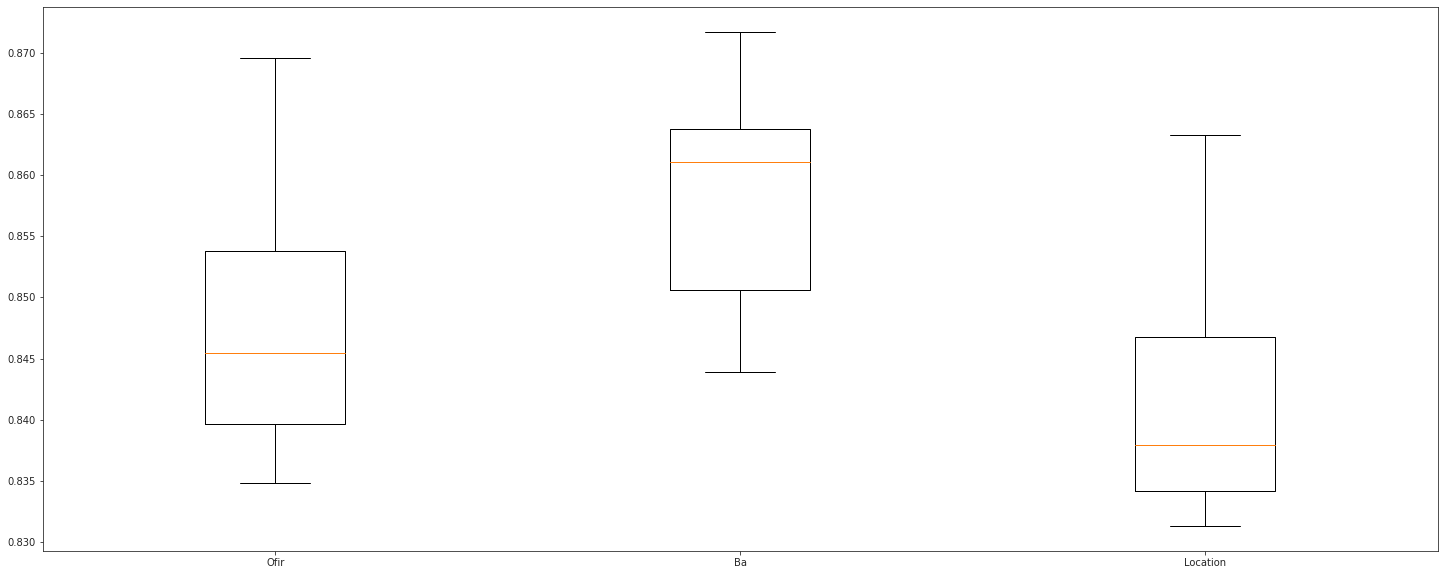

In [44]:
fig, ax = plt.subplots()

bp = ax.boxplot(tot,labels=['Ofir',"Ba",'Location'])

plt.show()

In [12]:
g11  = seir.generate_scale_free_graph(10000,min_degree=2,mean_degree=20,gamma=0.01)
g11 = nx.Graph(g11)

deg = g11.degree()

g31=nx.Graph()
g31.add_nodes_from(range(10000))
for i in range(len(data1)):

    dlist=distances[i]
    dlist.sort(key=mykey)
    #print(dlist[:20])
    edgelist=[]
    cntr= 0
    p=1
    while(cntr!=deg[i] and p<10000):
    #for k in range(deg[i]):
        k= dlist[p][1]
        if(g31.degree[k]<deg[k]):
            edgelist.append((i,k))
            cntr=cntr+1
        p=p+1

    g31.add_edges_from(edgelist)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [13]:
g12  = seir.generate_scale_free_graph(10000,min_degree=2,mean_degree=20,gamma=0.2)
g12 = nx.Graph(g12)

deg = g12.degree()

g32=nx.Graph()
g32.add_nodes_from(range(10000))
for i in range(len(data1)):

    dlist=distances[i]
    dlist.sort(key=mykey)
    #print(dlist[:20])
    edgelist=[]
    cntr= 0
    p=1
    while(cntr!=deg[i] and p<10000):
    #for k in range(deg[i]):
        k= dlist[p][1]
        if(g32.degree[k]<deg[k]):
            edgelist.append((i,k))
            cntr=cntr+1
        p=p+1

    g32.add_edges_from(edgelist)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [14]:
g13  = seir.generate_scale_free_graph(10000,min_degree=2,mean_degree=20,gamma=0.4)
g13 = nx.Graph(g13)

deg = g13.degree()

g33=nx.Graph()
g33.add_nodes_from(range(10000))
for i in range(len(data1)):

    dlist=distances[i]
    dlist.sort(key=mykey)
    #print(dlist[:20])
    edgelist=[]
    cntr= 0
    p=1
    while(cntr!=deg[i] and p<10000):
    #for k in range(deg[i]):
        k= dlist[p][1]
        if(g33.degree[k]<deg[k]):
            edgelist.append((i,k))
            cntr=cntr+1
        p=p+1

    g33.add_edges_from(edgelist)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

t = 0.01
t = 10.00
t = 20.01
t = 30.01
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.01
t = 90.01
t = 100.02
t = 110.05
t = 120.02
t = 130.13
t = 140.12
t = 150.92
t = 160.07
t = 170.37
t = 180.04
t = 190.80


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


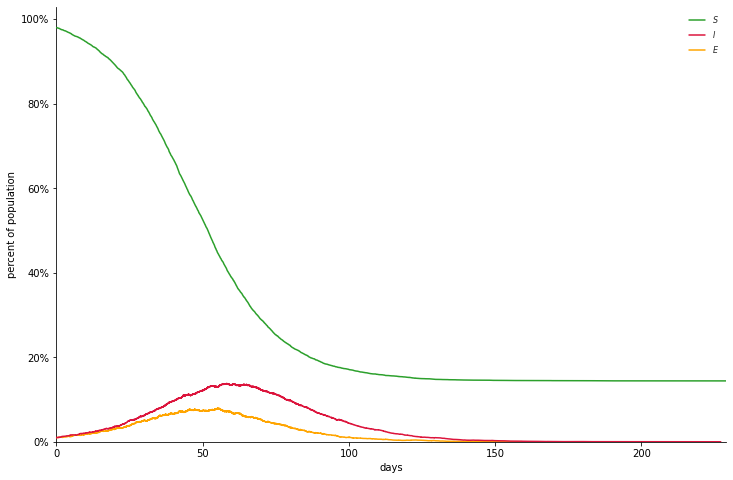

t = 0.00
t = 10.00
t = 20.01
t = 30.01
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.01
t = 100.02
t = 110.02
t = 120.03
t = 130.03
t = 140.02
t = 150.13
t = 160.45
t = 170.19
t = 180.22
t = 190.37
t = 200.45
t = 220.29


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


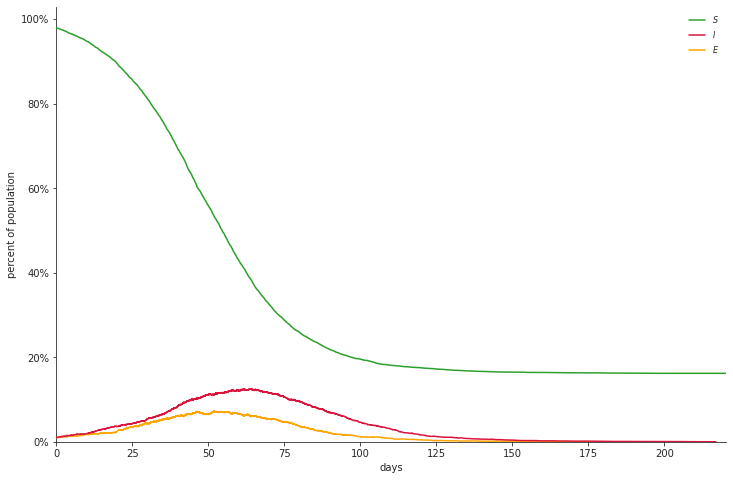

t = 0.05
t = 10.02
t = 20.01
t = 30.01
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.02
t = 90.00
t = 100.01
t = 110.01
t = 120.02
t = 130.12
t = 140.26
t = 150.38
t = 160.39
t = 170.97


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


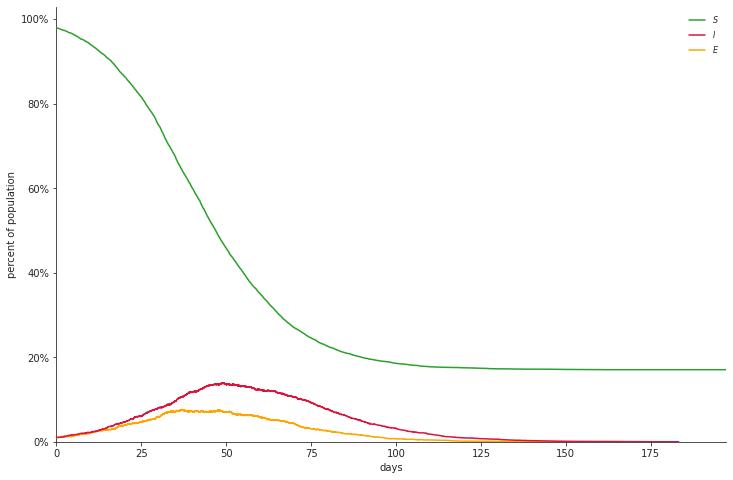

t = 0.01
t = 10.01
t = 20.00
t = 30.00
t = 40.00
t = 50.00
t = 60.01
t = 70.00
t = 80.00
t = 90.01
t = 100.01
t = 110.02
t = 120.01
t = 130.01
t = 140.05
t = 150.23
t = 160.07
t = 170.66
t = 180.33
t = 190.01
t = 240.05


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


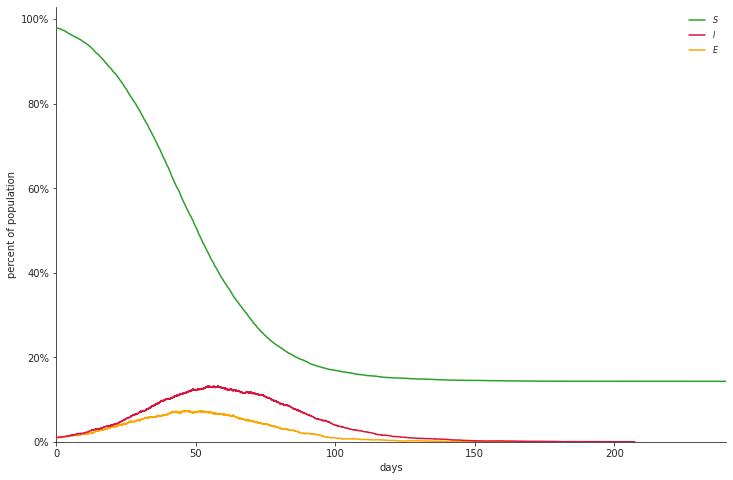

t = 0.02
t = 10.04
t = 20.00
t = 30.01
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.01
t = 90.00
t = 100.01
t = 110.01
t = 120.01
t = 130.30
t = 140.02
t = 160.86


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


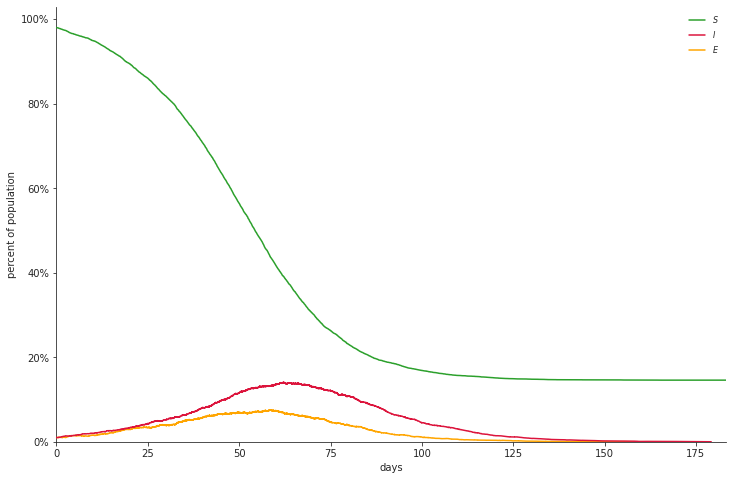

t = 0.01
t = 10.00
t = 20.00
t = 30.00
t = 40.00
t = 50.00
t = 60.01
t = 70.01
t = 80.01
t = 90.01
t = 100.03
t = 110.03
t = 120.01
t = 130.06
t = 140.05
t = 150.20
t = 160.55
t = 180.28


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


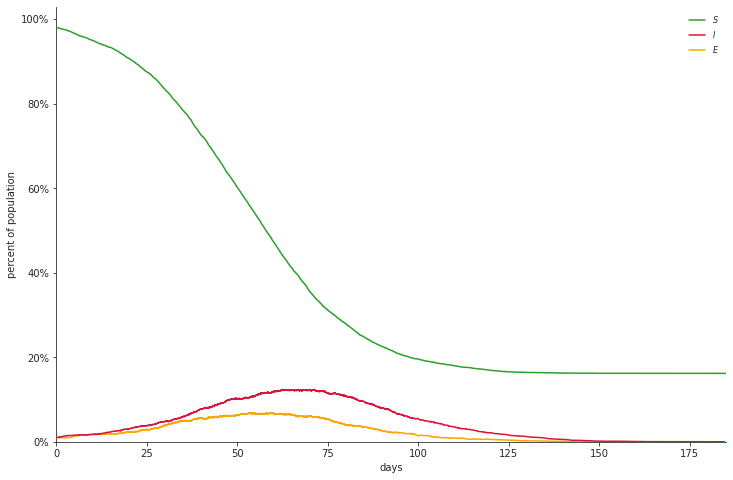

t = 0.05
t = 10.00
t = 20.00
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.02
t = 100.01
t = 110.02
t = 120.01
t = 130.01
t = 140.06
t = 150.09
t = 160.42


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


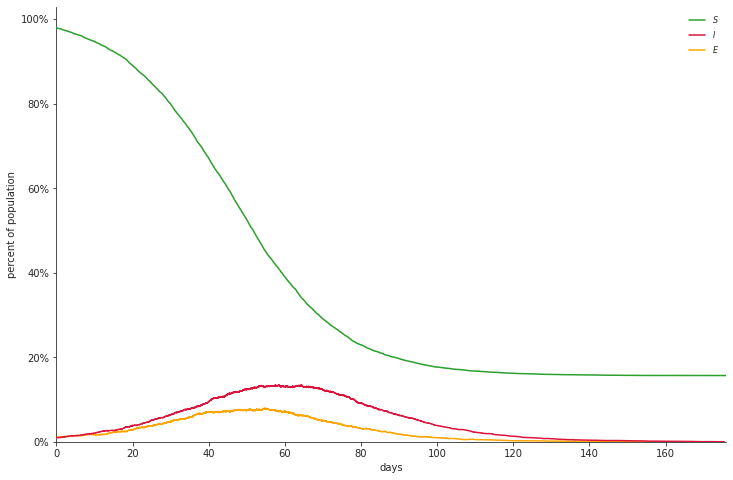

t = 0.00
t = 10.01
t = 20.01
t = 30.00
t = 40.00
t = 50.00
t = 60.01
t = 70.01
t = 80.00
t = 90.02
t = 100.01
t = 110.01
t = 120.09
t = 130.10
t = 140.04
t = 150.12
t = 160.21
t = 170.04
t = 180.15


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


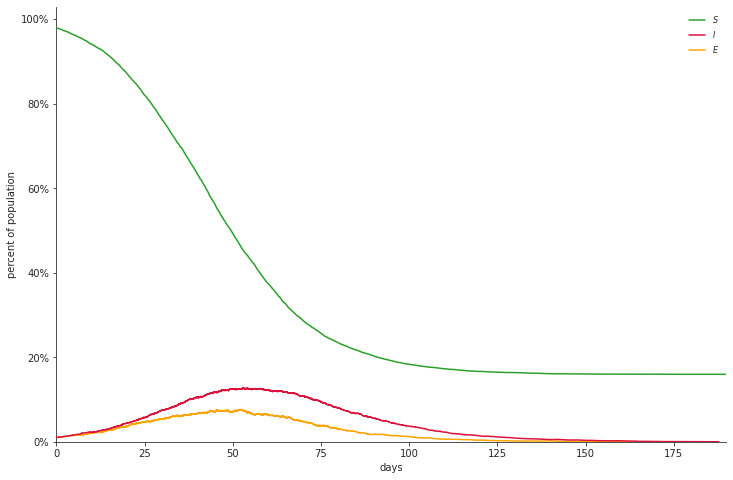

t = 0.03
t = 10.02
t = 20.01
t = 30.02
t = 40.01
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.00
t = 100.01
t = 110.00
t = 120.02
t = 130.03
t = 140.01
t = 150.03
t = 160.11
t = 170.00
t = 180.13
t = 190.01
t = 200.50


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


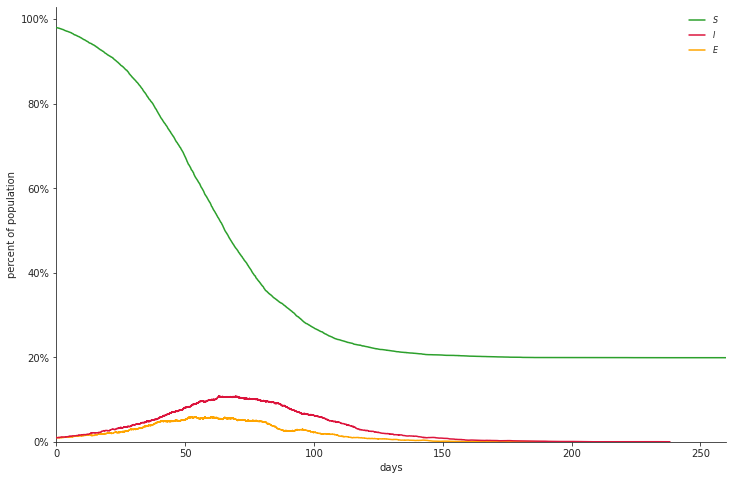

t = 0.00
t = 10.02
t = 20.01
t = 30.00
t = 40.01
t = 50.01
t = 60.00
t = 70.01
t = 80.00
t = 90.01
t = 100.00
t = 110.02
t = 120.00
t = 130.02
t = 140.05
t = 150.04
t = 160.18
t = 170.02
t = 180.44
t = 190.38
t = 200.59


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


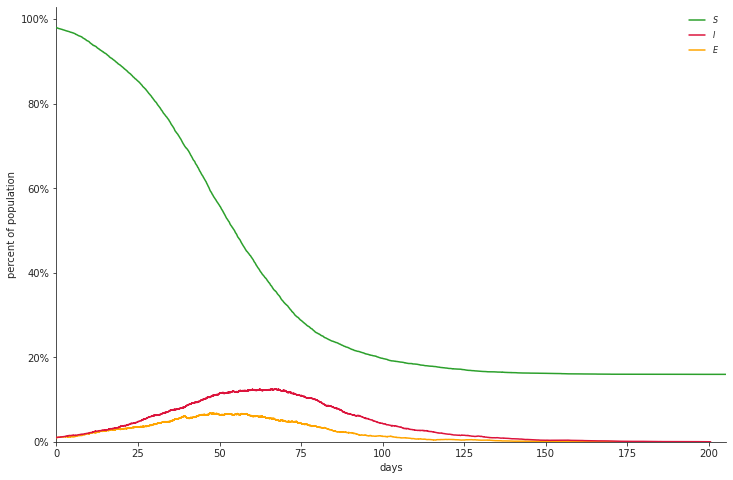

t = 0.01
t = 10.01
t = 20.00
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.02
t = 80.01
t = 90.01
t = 100.03
t = 110.03
t = 120.05
t = 130.00
t = 140.01
t = 150.13
t = 160.01
t = 170.29


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


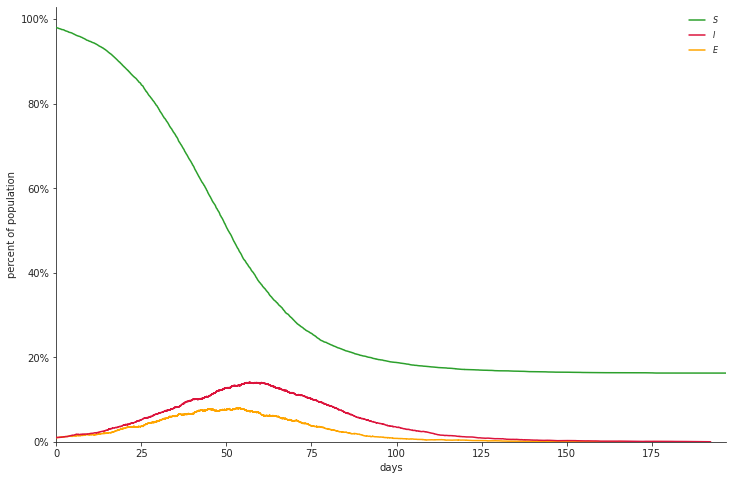

t = 0.02
t = 10.00
t = 20.00
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.02
t = 90.01
t = 100.02
t = 110.02
t = 120.03
t = 130.16
t = 140.14
t = 150.69
t = 160.09
t = 170.64


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


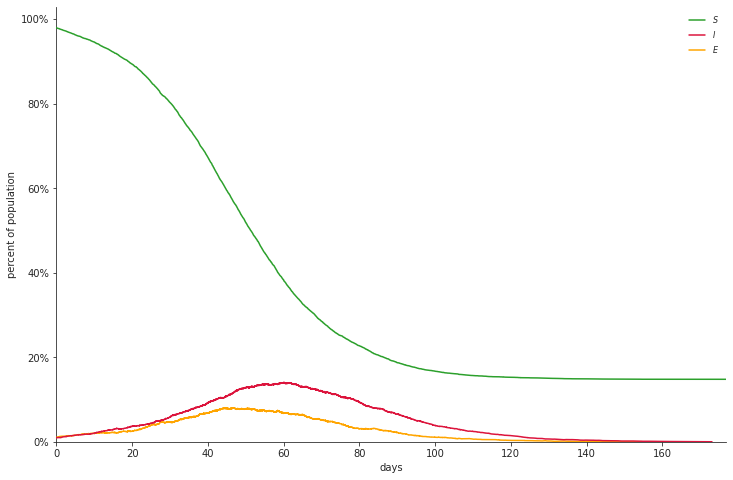

t = 0.00
t = 10.02
t = 20.02
t = 30.01
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.01
t = 100.00
t = 110.00
t = 120.11
t = 130.01
t = 140.22
t = 150.12
t = 160.00
t = 170.82
t = 180.58
t = 190.07
t = 200.58
t = 210.77


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


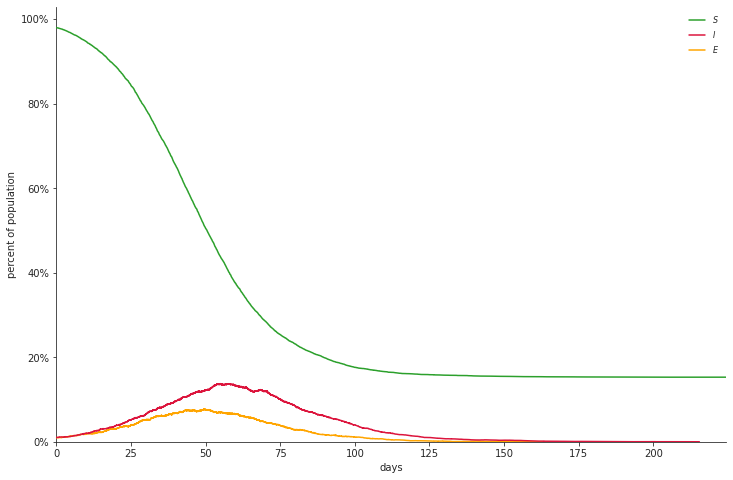

t = 0.03
t = 10.01
t = 20.01
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.01
t = 80.00
t = 90.01
t = 100.00
t = 110.05
t = 120.01
t = 130.04
t = 140.07
t = 150.19
t = 160.23
t = 170.19


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


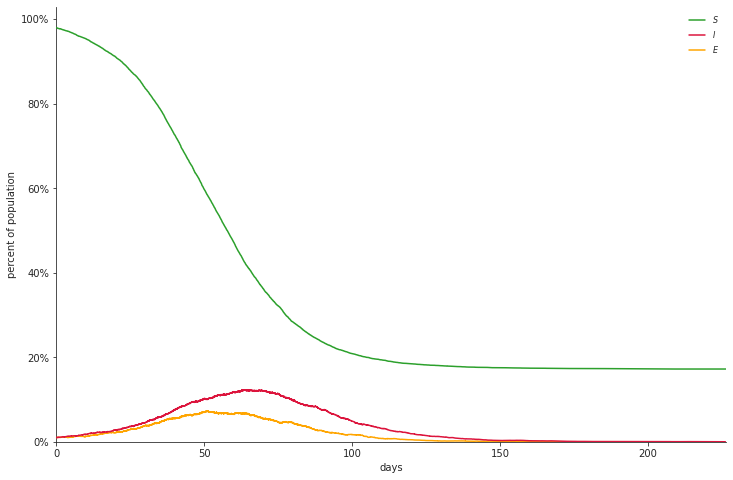

t = 0.00
t = 10.02
t = 20.00
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.00
t = 100.00
t = 110.01
t = 120.05
t = 130.04
t = 140.01
t = 150.03
t = 160.15
t = 170.76


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


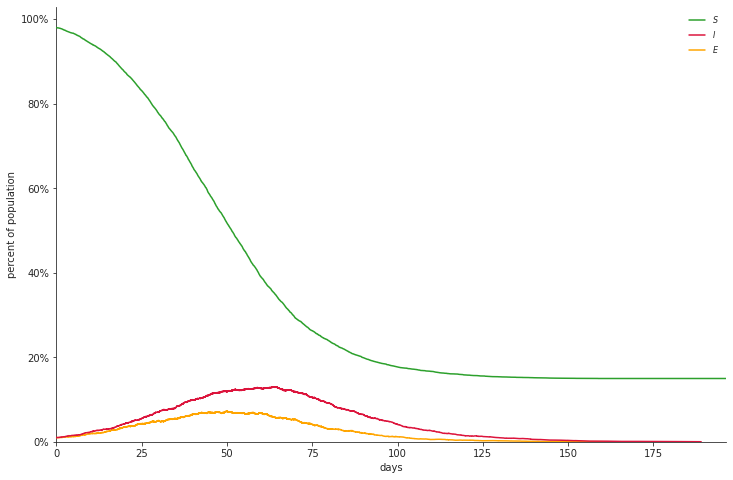

t = 0.05
t = 10.01
t = 20.00
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.01
t = 90.02
t = 100.01
t = 110.00
t = 120.00
t = 130.08
t = 140.01
t = 150.03
t = 160.04
t = 170.33
t = 180.12


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


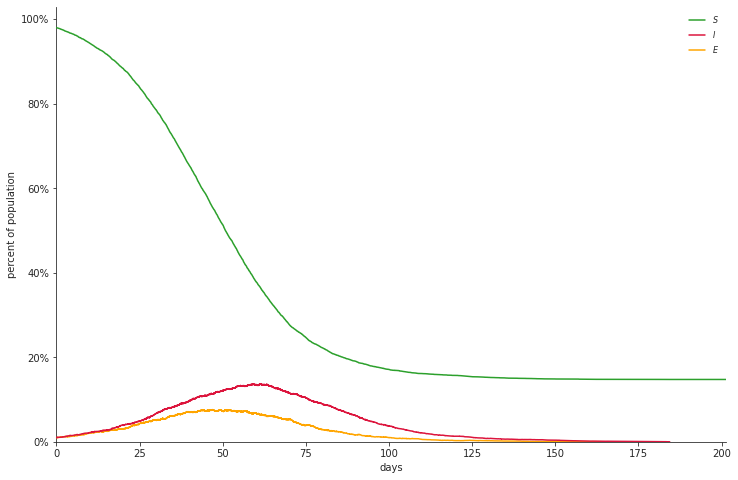

t = 0.05
t = 10.01
t = 20.02
t = 30.00
t = 40.00
t = 50.01
t = 60.00
t = 70.00
t = 80.02
t = 90.00
t = 100.02
t = 110.04
t = 120.05
t = 130.07
t = 140.04
t = 150.10
t = 160.09
t = 170.05
t = 180.21
t = 190.92


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


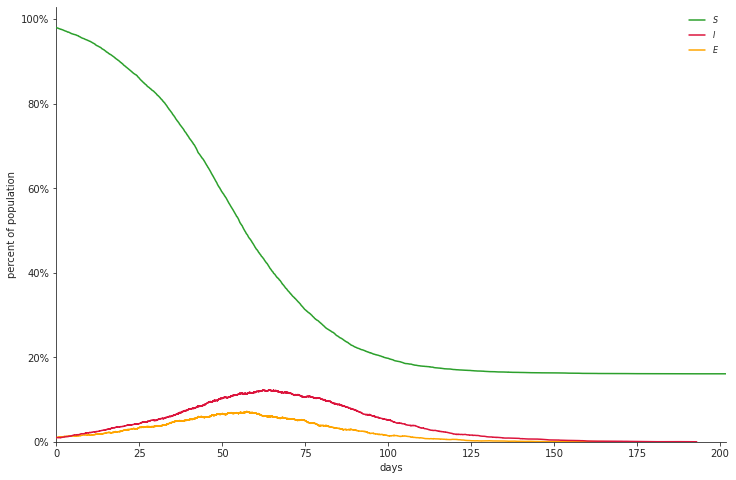

t = 0.01
t = 10.02
t = 20.00
t = 30.00
t = 40.00
t = 50.01
t = 60.00
t = 70.00
t = 80.00
t = 90.01
t = 100.02
t = 110.03
t = 120.02
t = 130.02
t = 140.12
t = 150.09
t = 180.91
t = 190.26


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


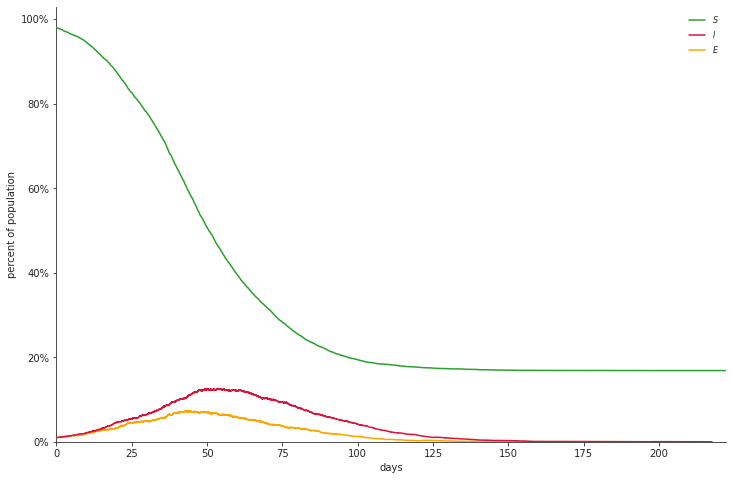

t = 0.00
t = 10.00
t = 20.02
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.00
t = 100.01
t = 110.04
t = 120.05
t = 130.03
t = 140.02
t = 150.12
t = 160.07
t = 170.08
t = 210.32


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


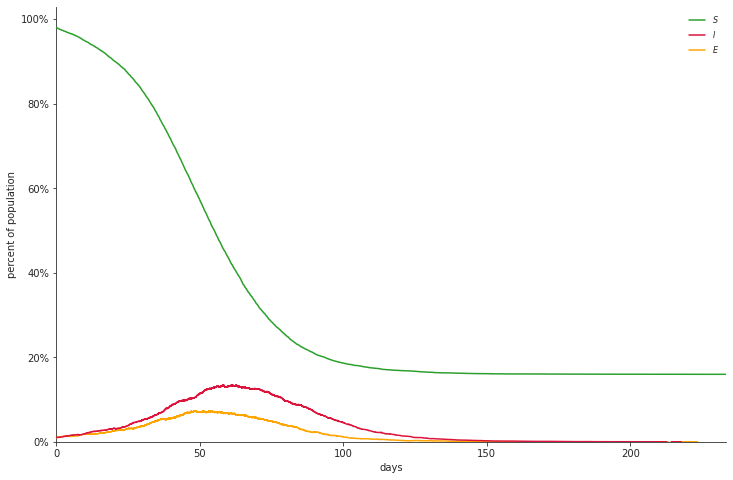

t = 0.05
t = 10.04
t = 20.01
t = 30.01
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.01
t = 90.00
t = 100.00
t = 110.07
t = 120.09
t = 130.04
t = 140.17
t = 150.57
t = 180.25


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


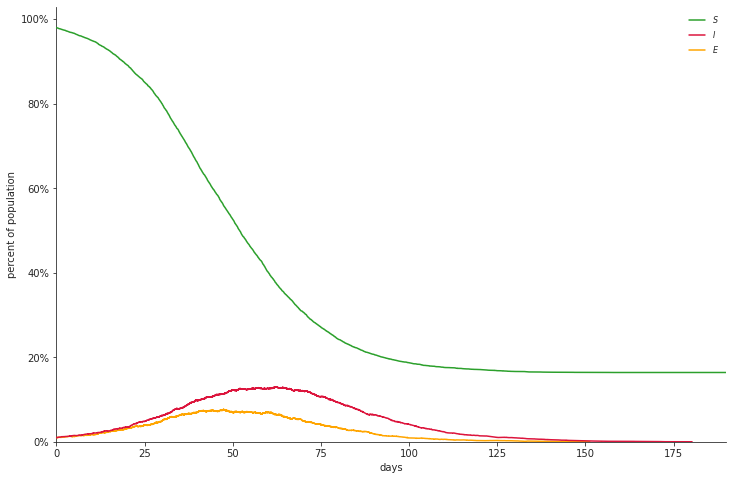

t = 0.00
t = 10.04
t = 20.00
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.00
t = 100.00
t = 110.02
t = 120.02
t = 130.03
t = 140.03
t = 150.25
t = 160.02
t = 170.13
t = 180.14
t = 190.00
t = 200.14


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


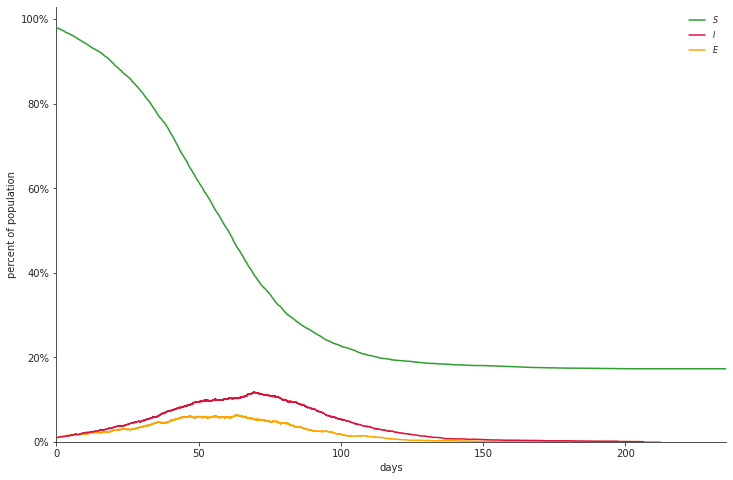

t = 0.08
t = 10.00
t = 20.00
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.02
t = 80.01
t = 90.00
t = 100.02
t = 110.04
t = 120.02
t = 130.02
t = 140.13
t = 150.37
t = 160.08


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


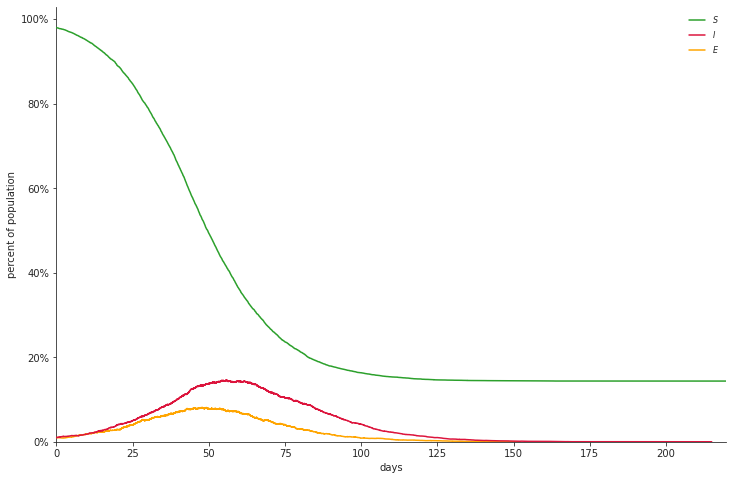

t = 0.02
t = 10.00
t = 20.00
t = 30.01
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.02
t = 100.01
t = 110.00
t = 120.00
t = 130.10
t = 140.01
t = 150.38
t = 160.19
t = 180.60
t = 220.39


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


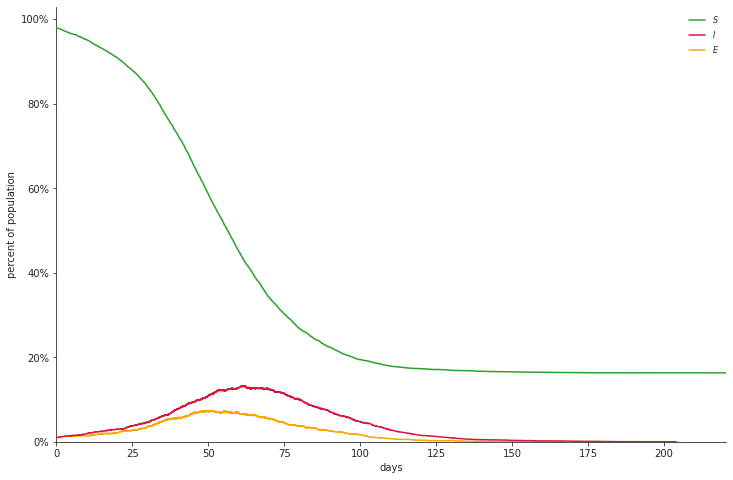

t = 0.01
t = 10.01
t = 20.00
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.01
t = 80.00
t = 90.00
t = 100.01
t = 110.01
t = 120.01
t = 130.01
t = 140.02
t = 150.09
t = 160.71
t = 170.50
t = 180.08


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


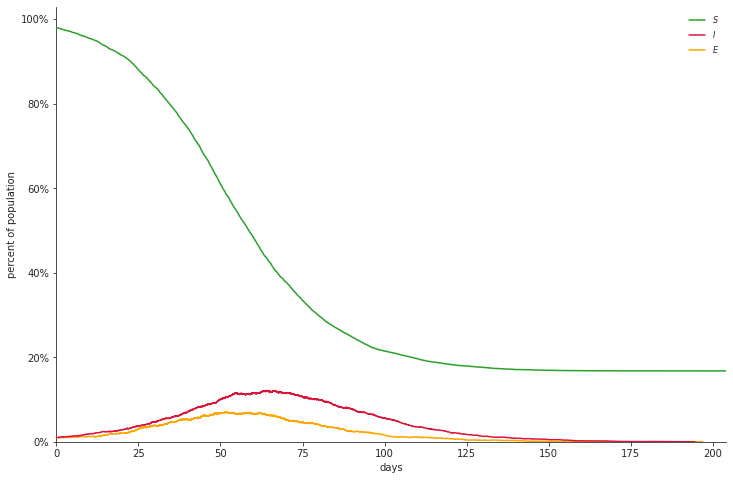

t = 0.00
t = 10.00
t = 20.00
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.01
t = 100.02
t = 110.01
t = 120.09
t = 130.06
t = 140.03
t = 150.01
t = 160.09
t = 180.42
t = 190.45


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


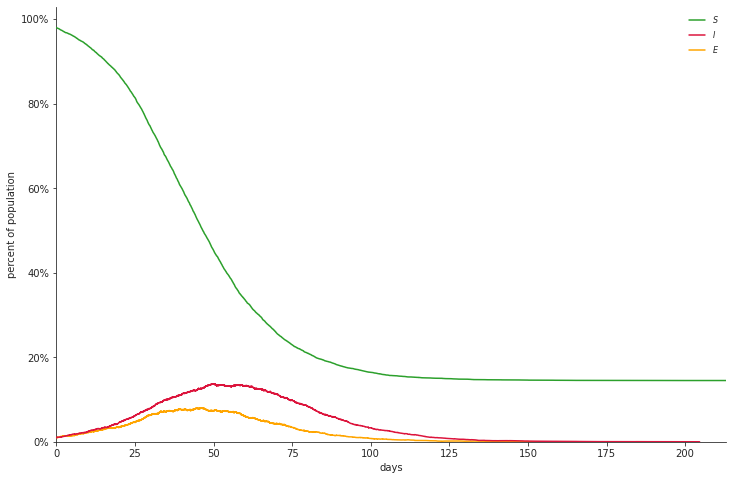

t = 0.03
t = 10.00
t = 20.00
t = 30.00
t = 40.00
t = 50.00
t = 60.01
t = 70.00
t = 80.02
t = 90.01
t = 100.01
t = 110.01
t = 120.01
t = 130.04
t = 140.05
t = 150.07


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


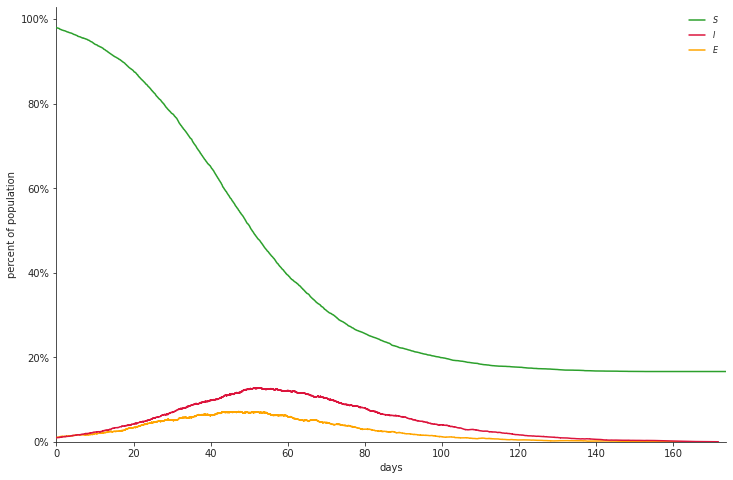

t = 0.01
t = 10.01
t = 20.01
t = 30.01
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.02
t = 100.05
t = 110.07
t = 120.02
t = 130.07
t = 140.43
t = 150.12
t = 160.31
t = 180.34
t = 200.68


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


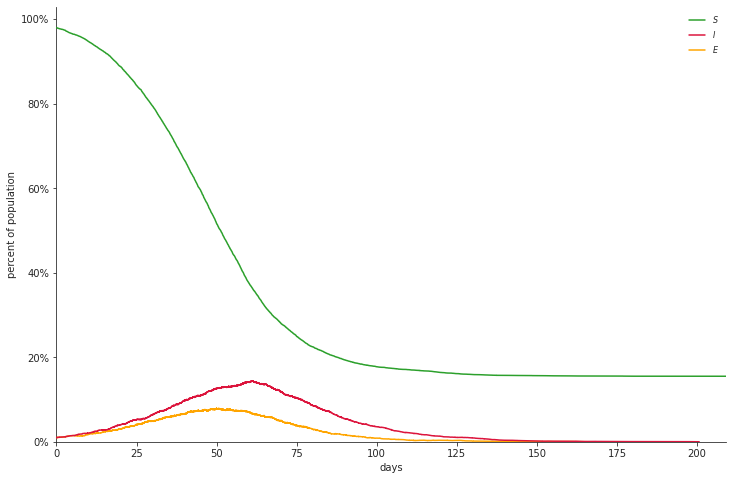

t = 0.02
t = 10.00
t = 20.01
t = 30.02
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.00
t = 100.00
t = 110.03
t = 120.02
t = 130.01
t = 140.00
t = 150.14
t = 160.00
t = 190.99


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


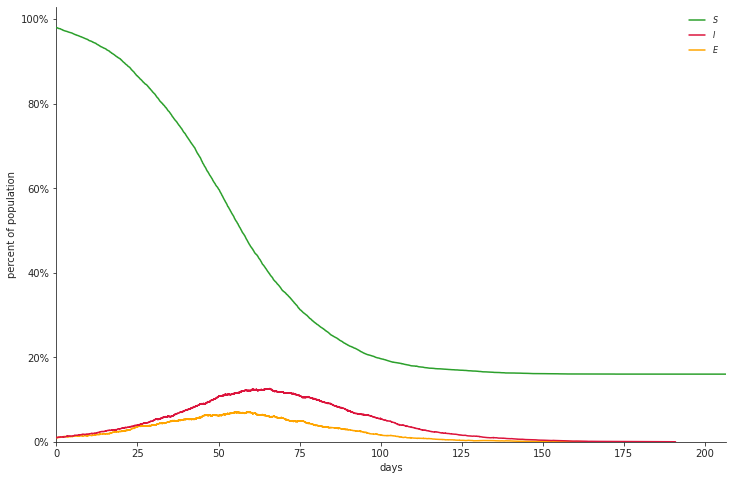

t = 0.01
t = 10.01
t = 20.02
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.01
t = 80.01
t = 90.00
t = 100.01
t = 110.04
t = 120.03
t = 130.04
t = 140.04
t = 150.57
t = 160.27
t = 170.02
t = 180.41


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


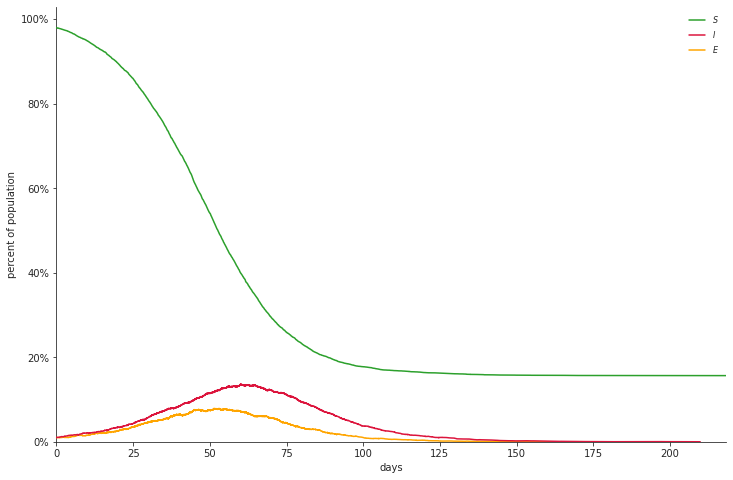

t = 0.01
t = 10.00
t = 20.01
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.01
t = 100.00
t = 110.01
t = 120.02
t = 130.01
t = 140.07
t = 150.23
t = 170.50
t = 180.87


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


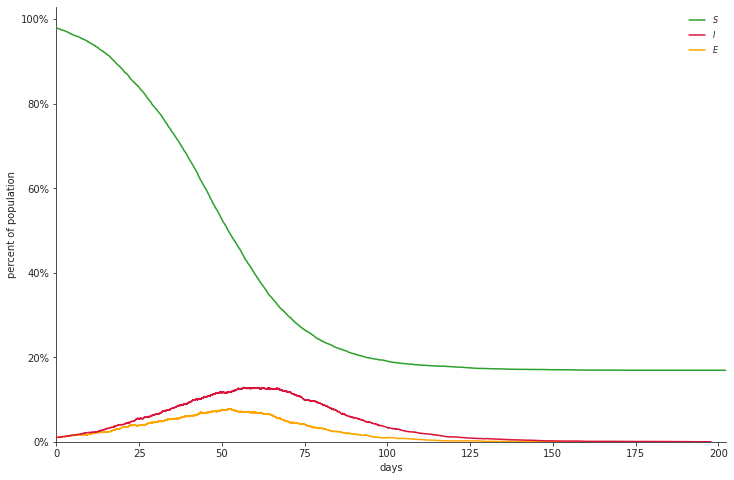

In [15]:
op11 = []
op12= []
op13 =[]
l11=[]
l12=[]
l13=[]
for i in range(10):
    res1,line1 = ipfnB(g11,e=1,i=1)
    res2,line2 = ipfnB(g12,e=1,i=1)
    res3,line3 = ipfnB(g13,e=1,i=1)
    op11.append(res1)
    op12.append(res2)
    op13.append(res3)
    l11.append(line1)
    l12.append(line2)
    l13.append(line3)


t = 0.01
t = 10.01
t = 20.01
t = 30.00
t = 40.01
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.01
t = 100.03
t = 110.02
t = 120.01
t = 130.05
t = 140.02
t = 150.01
t = 160.14
t = 170.47
t = 180.02
t = 190.10
t = 240.47


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


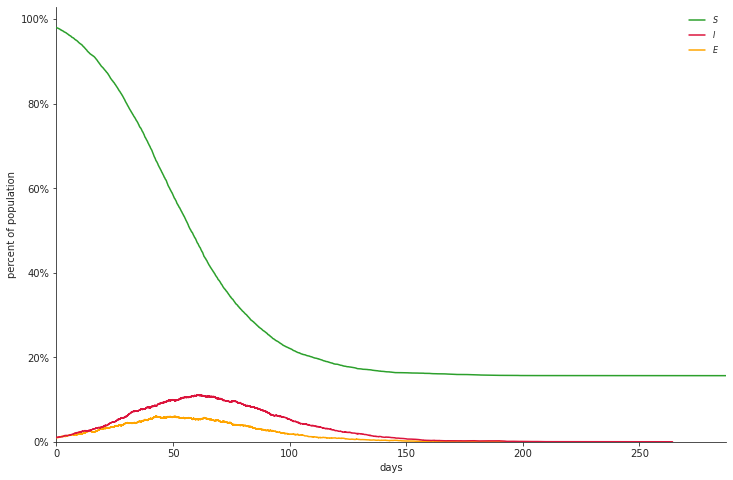

t = 0.01
t = 10.01
t = 20.00
t = 30.00
t = 40.00
t = 50.00
t = 60.01
t = 70.00
t = 80.00
t = 90.00
t = 100.02
t = 110.01
t = 120.04
t = 130.03
t = 140.04
t = 150.00
t = 160.07
t = 170.05
t = 180.66
t = 190.33
t = 200.23


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


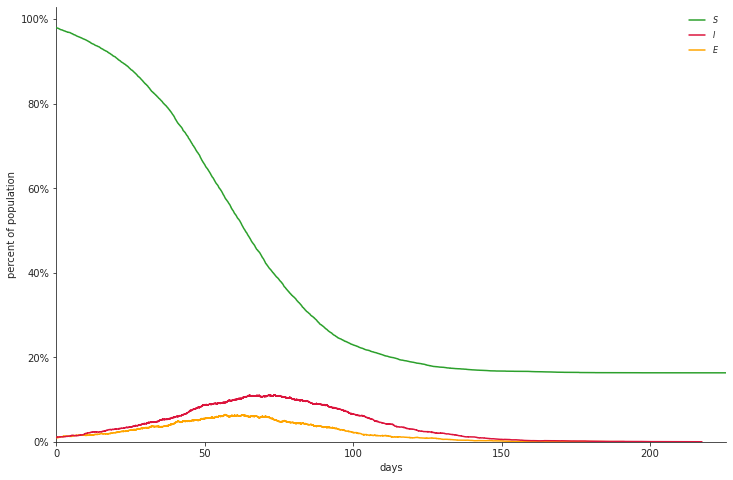

t = 0.01
t = 10.01
t = 20.00
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.01
t = 80.01
t = 90.02
t = 100.01
t = 110.06
t = 120.01
t = 130.07
t = 140.02
t = 150.06
t = 160.00
t = 170.49
t = 180.13
t = 190.20
t = 200.12
t = 210.54
t = 220.45
t = 240.15


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


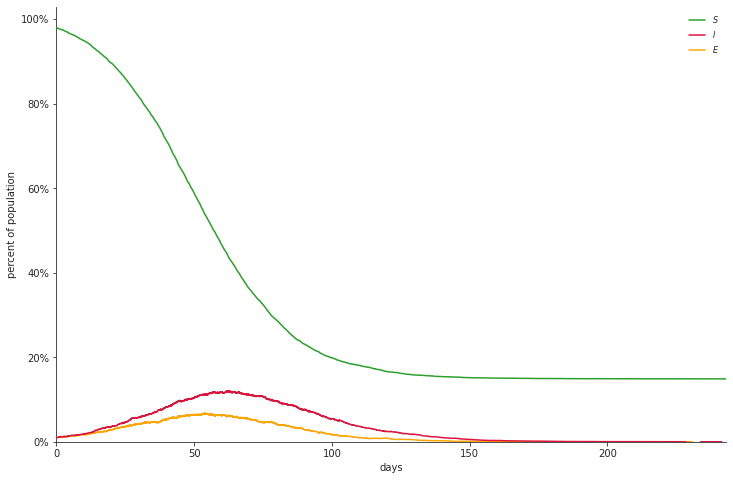

t = 0.03
t = 10.01
t = 20.01
t = 30.00
t = 40.01
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.00
t = 100.01
t = 110.01
t = 120.00
t = 130.01
t = 140.03
t = 150.00
t = 160.12
t = 170.39
t = 180.08
t = 190.14


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


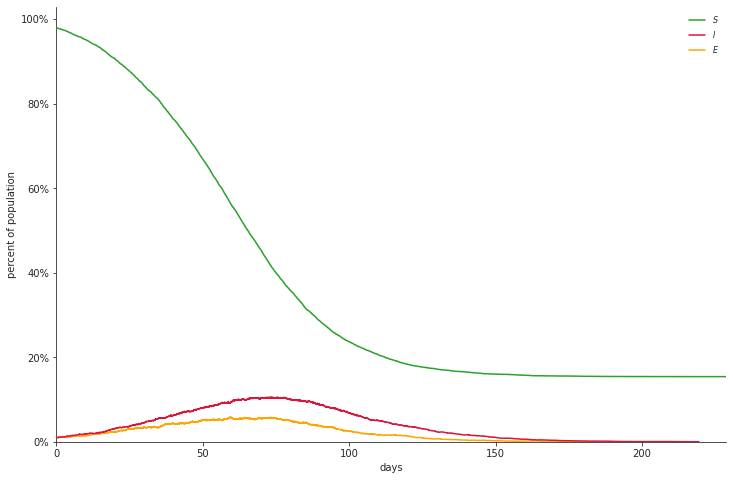

t = 0.08
t = 10.00
t = 20.01
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.01
t = 80.03
t = 90.00
t = 100.00
t = 110.01
t = 120.03
t = 130.00
t = 140.17
t = 150.02
t = 160.22
t = 170.32


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


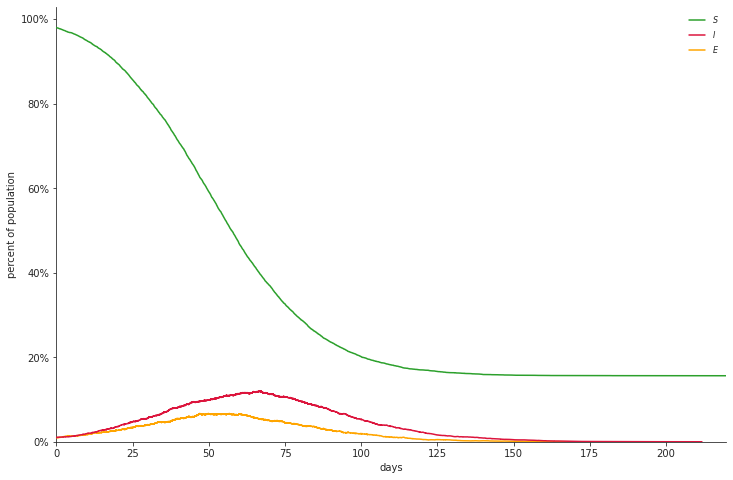

t = 0.00
t = 10.01
t = 20.00
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.01
t = 80.01
t = 90.01
t = 100.03
t = 110.00
t = 120.05
t = 130.00
t = 140.02
t = 150.32
t = 160.26
t = 170.30


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


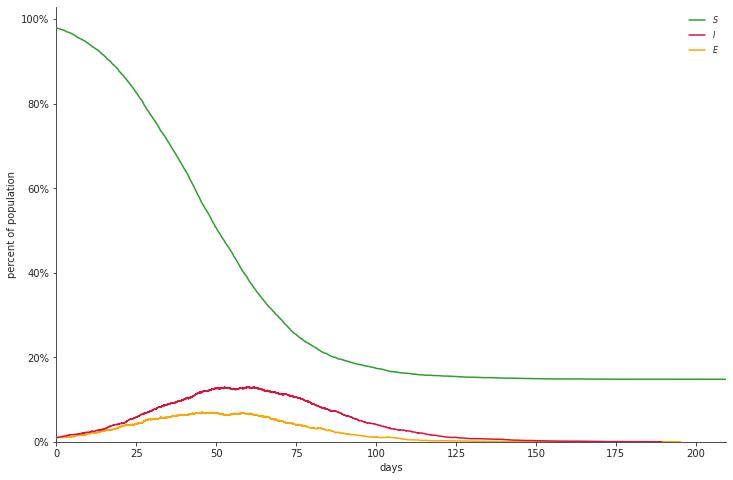

t = 0.02
t = 10.07
t = 20.03
t = 30.00
t = 40.00
t = 50.00
t = 60.01
t = 70.00
t = 80.01
t = 90.01
t = 100.00
t = 110.01
t = 120.01
t = 130.06
t = 140.02
t = 150.02
t = 160.14
t = 170.25
t = 180.35


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


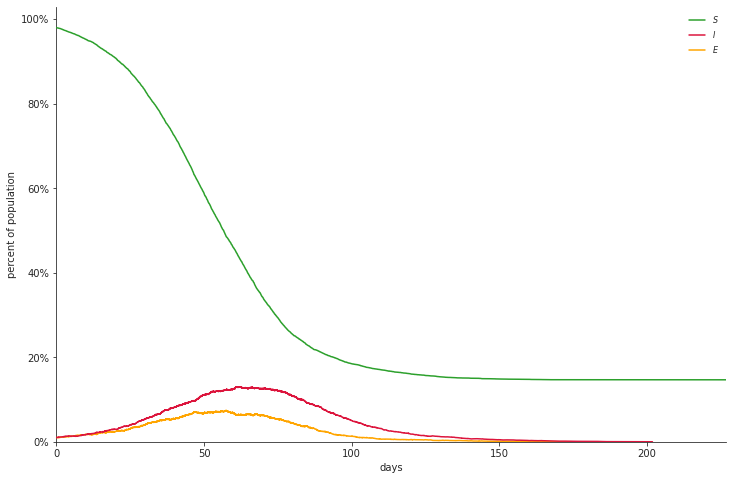

t = 0.04
t = 10.02
t = 20.04
t = 30.00
t = 40.01
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.00
t = 100.01
t = 110.00
t = 120.01
t = 130.04
t = 140.02
t = 150.05
t = 160.01
t = 170.76
t = 180.17
t = 190.97


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


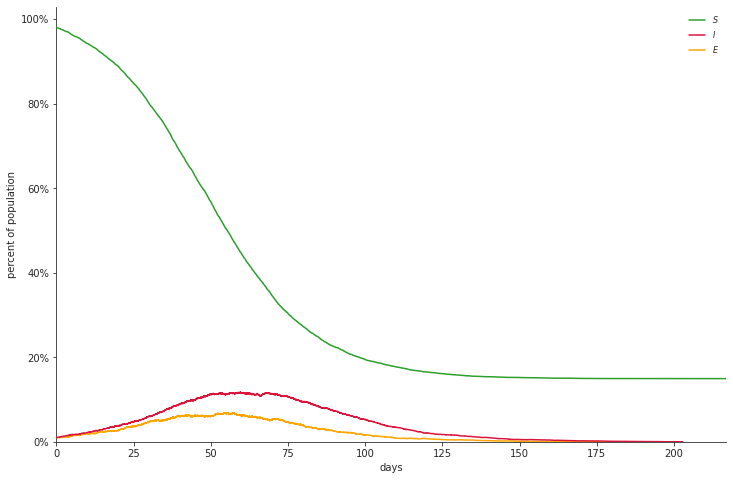

t = 0.00
t = 10.01
t = 20.01
t = 30.01
t = 40.00
t = 50.01
t = 60.00
t = 70.00
t = 80.00
t = 90.01
t = 100.05
t = 110.06
t = 120.03
t = 130.04
t = 140.03
t = 150.15
t = 160.37
t = 170.42
t = 180.69
t = 190.18
t = 200.21
t = 210.49
t = 230.88
t = 240.04
t = 250.31
t = 260.01


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


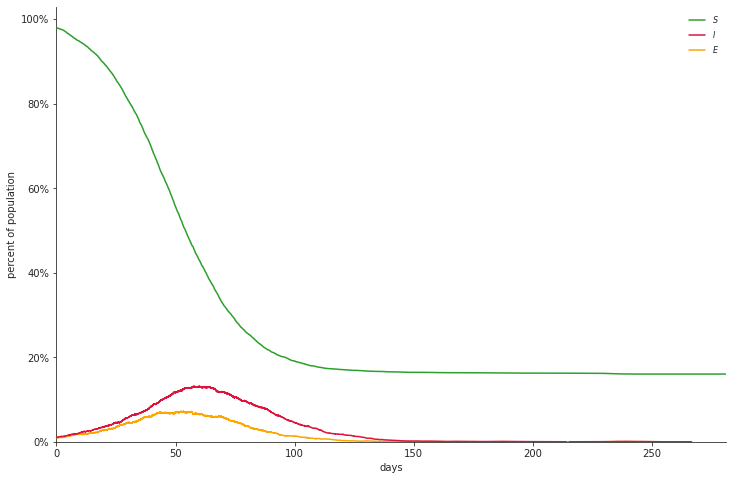

t = 0.01
t = 10.01
t = 20.00
t = 30.00
t = 40.01
t = 50.01
t = 60.00
t = 70.00
t = 80.00
t = 90.01
t = 100.00
t = 110.09
t = 120.07
t = 130.00
t = 140.01
t = 150.26
t = 160.16
t = 170.17
t = 180.33
t = 190.29
t = 200.15
t = 220.93
t = 240.25


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


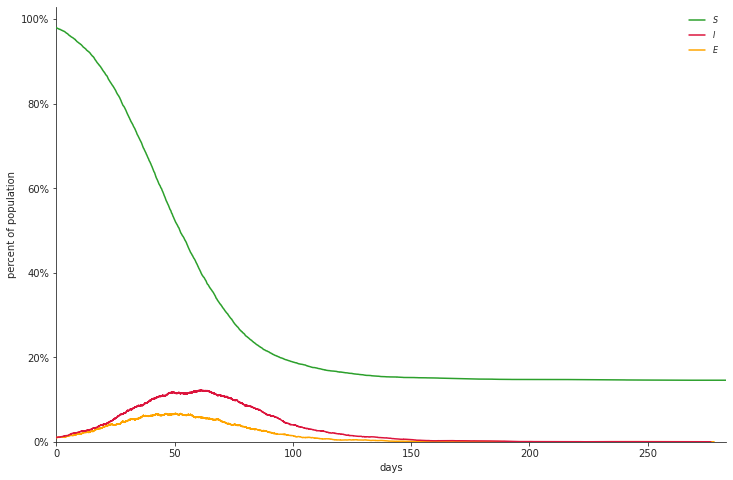

t = 0.00
t = 10.00
t = 20.01
t = 30.01
t = 40.00
t = 50.00
t = 60.01
t = 70.00
t = 80.00
t = 90.01
t = 100.01
t = 110.03
t = 120.01
t = 130.04
t = 140.01
t = 150.00
t = 160.07
t = 170.09
t = 180.54
t = 190.30


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


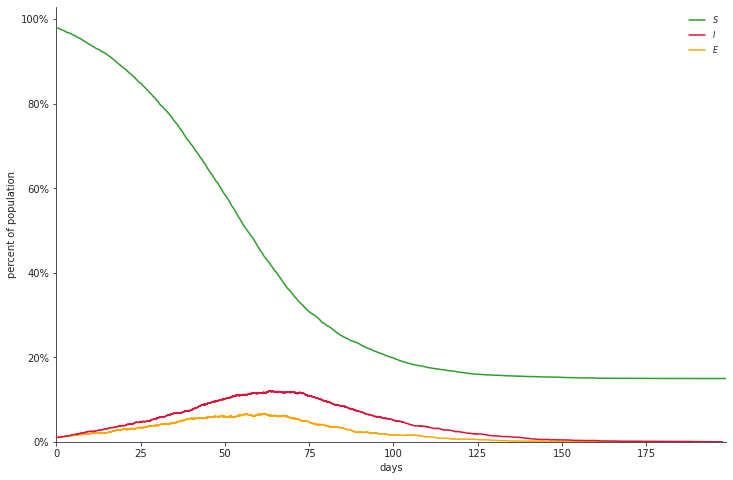

t = 0.00
t = 10.02
t = 20.00
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.01
t = 100.04
t = 110.00
t = 120.09
t = 130.01
t = 140.06
t = 150.07
t = 160.18
t = 170.08
t = 180.78
t = 190.12


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


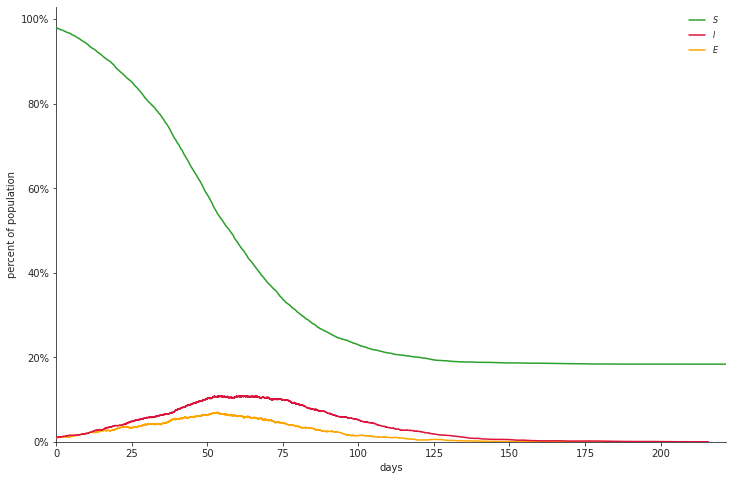

t = 0.03
t = 10.00
t = 20.00
t = 30.00
t = 40.00
t = 50.01
t = 60.00
t = 70.00
t = 80.02
t = 90.01
t = 100.02
t = 110.01
t = 120.01
t = 130.03
t = 140.09
t = 150.07
t = 160.01
t = 170.13
t = 180.03
t = 190.08
t = 200.04
t = 210.45


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


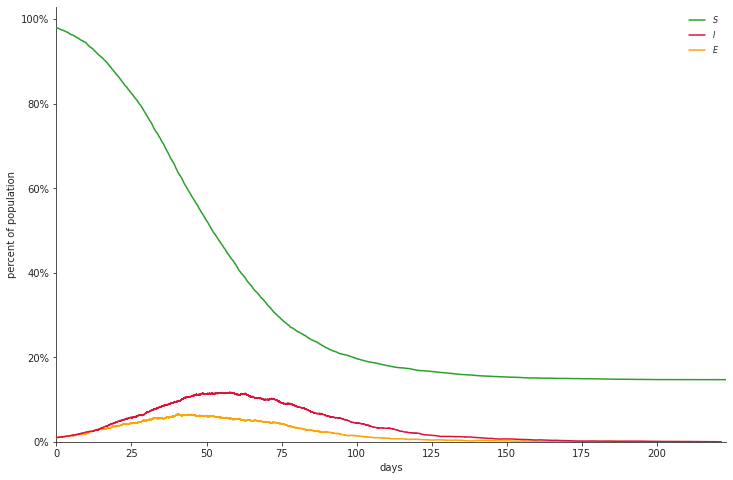

t = 0.01
t = 10.01
t = 20.01
t = 30.02
t = 40.01
t = 50.00
t = 60.00
t = 70.01
t = 80.01
t = 90.03
t = 100.00
t = 110.00
t = 120.05
t = 130.01
t = 140.00
t = 150.08
t = 160.06
t = 170.08
t = 180.35
t = 190.30
t = 210.45
t = 220.71


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


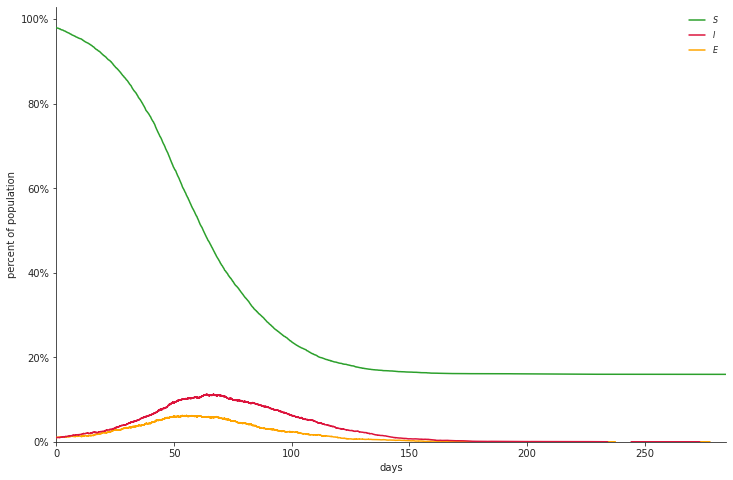

t = 0.01
t = 10.02
t = 20.00
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.01
t = 80.00
t = 90.01
t = 100.01
t = 110.02
t = 120.00
t = 130.00
t = 140.05
t = 150.01
t = 160.18
t = 170.36
t = 180.00
t = 200.13
t = 240.67


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


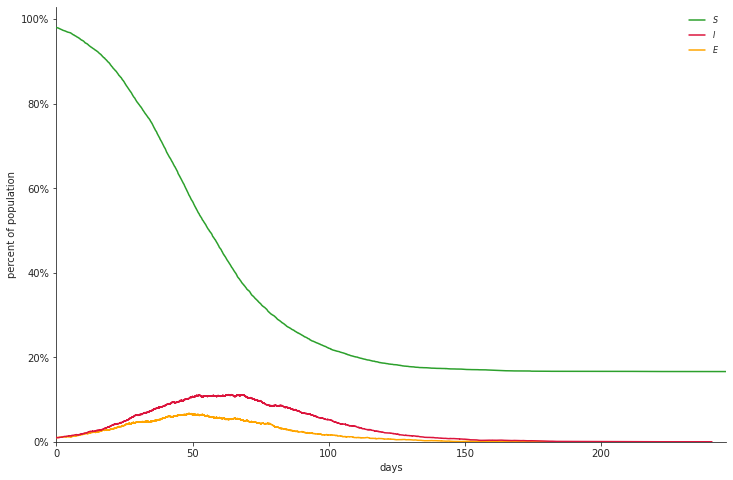

t = 0.00
t = 10.01
t = 20.00
t = 30.01
t = 40.00
t = 50.01
t = 60.01
t = 70.00
t = 80.00
t = 90.00
t = 100.00
t = 110.00
t = 120.02
t = 130.03
t = 140.21
t = 150.20
t = 160.31


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


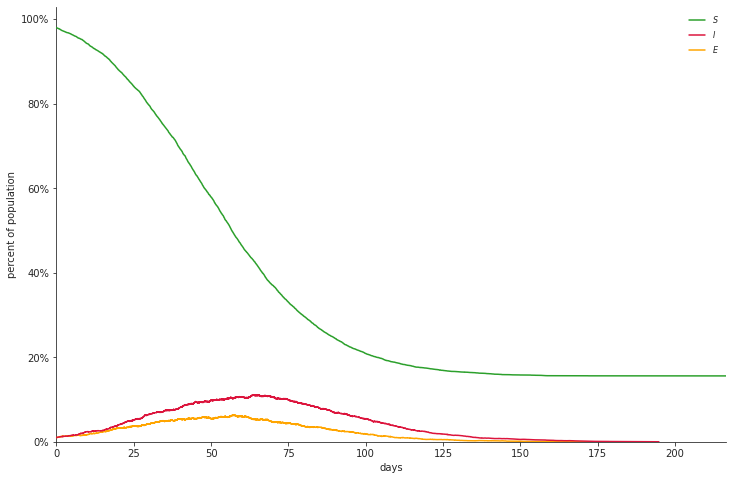

t = 0.01
t = 10.01
t = 20.00
t = 30.01
t = 40.00
t = 50.00
t = 60.00
t = 70.01
t = 80.00
t = 90.00
t = 100.01
t = 110.03
t = 120.04
t = 130.04
t = 140.13
t = 150.02
t = 160.41
t = 170.44
t = 180.15
t = 190.47
t = 220.72


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


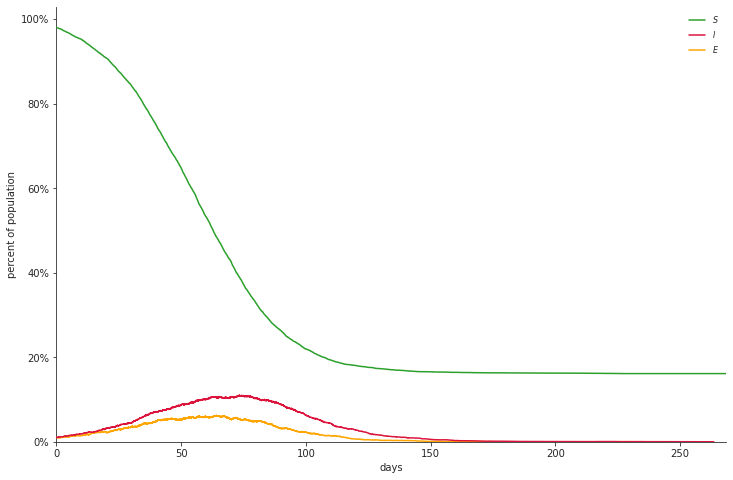

t = 0.03
t = 10.00
t = 20.00
t = 30.01
t = 40.01
t = 50.01
t = 60.00
t = 70.01
t = 80.00
t = 90.00
t = 100.00
t = 110.00
t = 120.01
t = 130.01
t = 140.13
t = 150.00
t = 160.01
t = 170.22
t = 180.04
t = 200.31
t = 210.17
t = 230.04


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


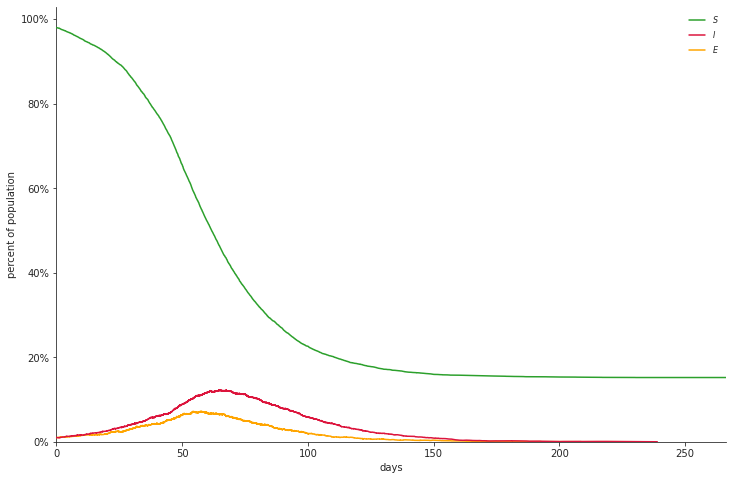

t = 0.01
t = 10.02
t = 20.01
t = 30.01
t = 40.00
t = 50.01
t = 60.00
t = 70.00
t = 80.00
t = 90.01
t = 100.00
t = 110.00
t = 120.02
t = 130.02
t = 140.06
t = 150.08
t = 160.50
t = 170.84
t = 180.08


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


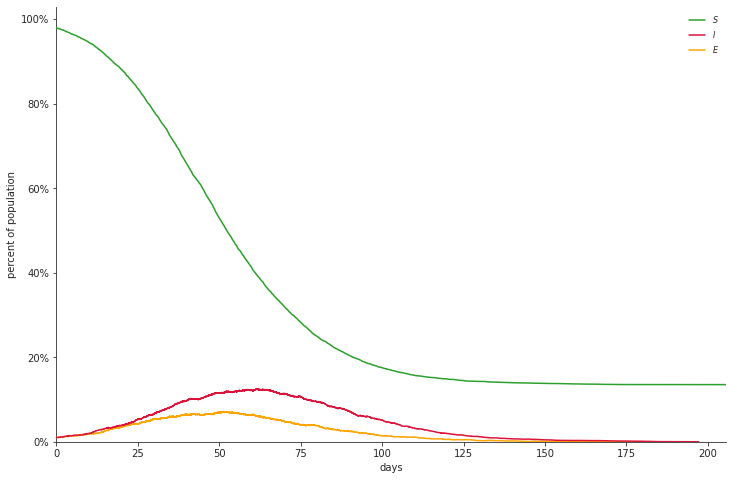

t = 0.02
t = 10.00
t = 20.01
t = 30.00
t = 40.01
t = 50.00
t = 60.01
t = 70.00
t = 80.01
t = 90.01
t = 100.02
t = 110.03
t = 120.10
t = 130.01
t = 140.01
t = 150.01
t = 160.66
t = 170.04
t = 180.13
t = 190.84


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


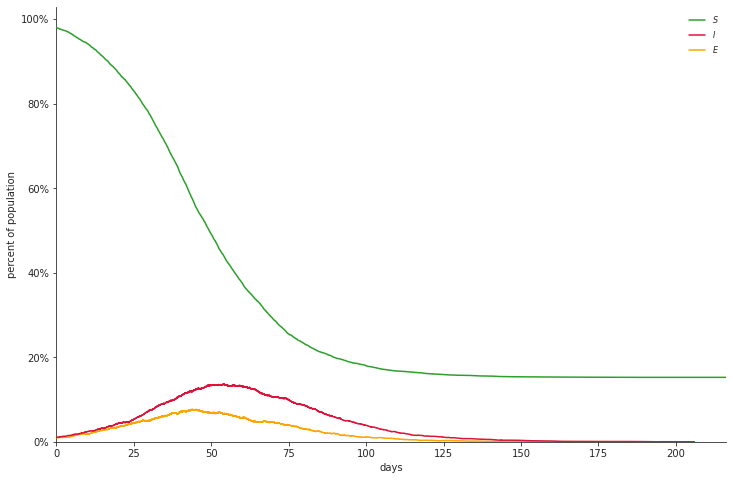

t = 0.00
t = 10.00
t = 20.02
t = 30.00
t = 40.01
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.00
t = 100.00
t = 110.00
t = 120.00
t = 130.00
t = 140.46
t = 150.09
t = 160.38
t = 170.08
t = 180.03
t = 190.36


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


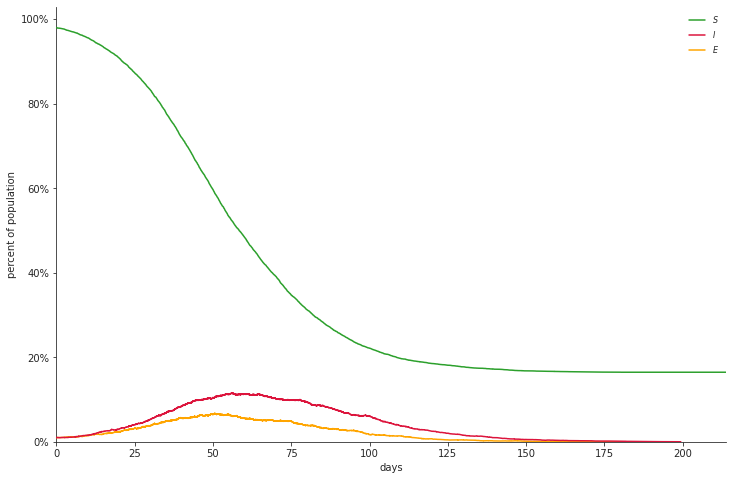

t = 0.02
t = 10.05
t = 20.02
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.01
t = 80.00
t = 90.01
t = 100.01
t = 110.00
t = 120.02
t = 130.03
t = 140.09
t = 150.06
t = 160.04
t = 170.14
t = 210.82


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


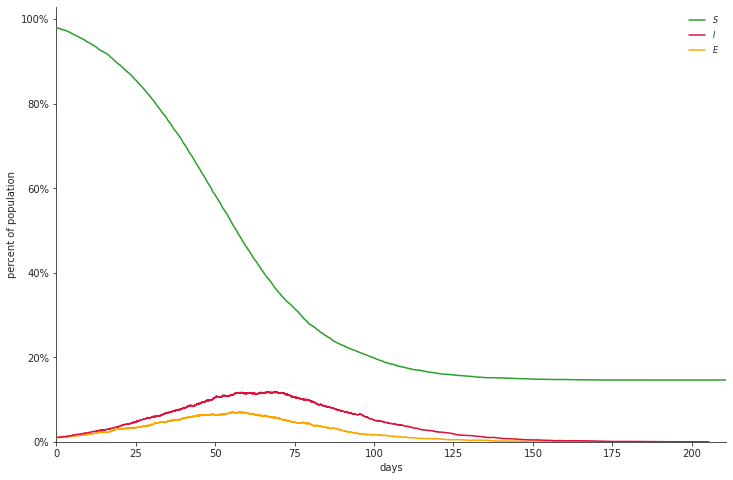

t = 0.00
t = 10.01
t = 20.00
t = 30.01
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.01
t = 100.00
t = 110.02
t = 120.05
t = 130.03
t = 140.08
t = 150.10
t = 160.46
t = 170.54


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


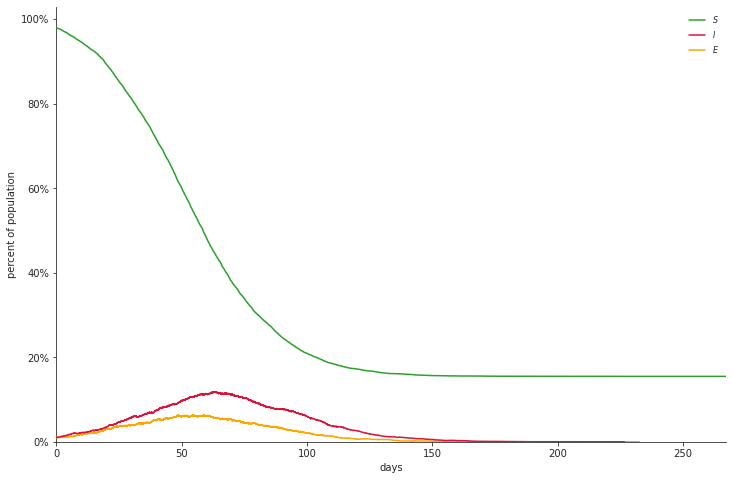

t = 0.00
t = 10.02
t = 20.02
t = 30.00
t = 40.00
t = 50.00
t = 60.01
t = 70.00
t = 80.00
t = 90.01
t = 100.01
t = 110.02
t = 120.07
t = 130.09
t = 140.03
t = 150.02
t = 160.03
t = 170.11
t = 180.32
t = 210.61


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


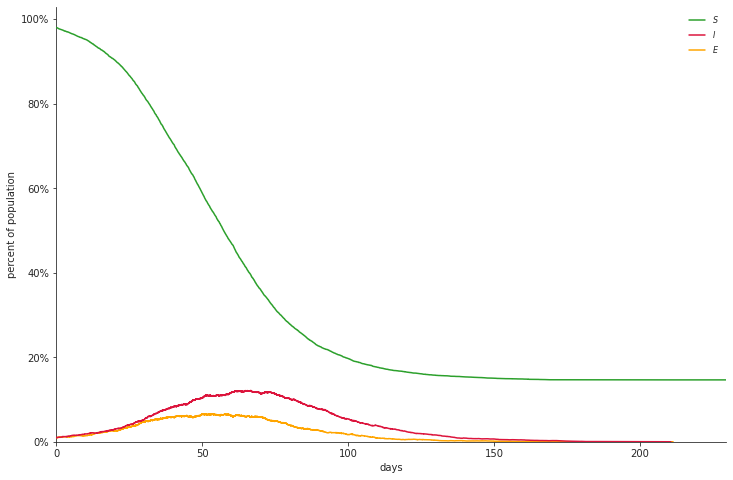

t = 0.02
t = 10.00
t = 20.02
t = 30.00
t = 40.01
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.00
t = 100.01
t = 110.01
t = 120.01
t = 130.00
t = 140.05
t = 150.01
t = 160.21
t = 170.34
t = 180.29
t = 200.25
t = 220.67


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


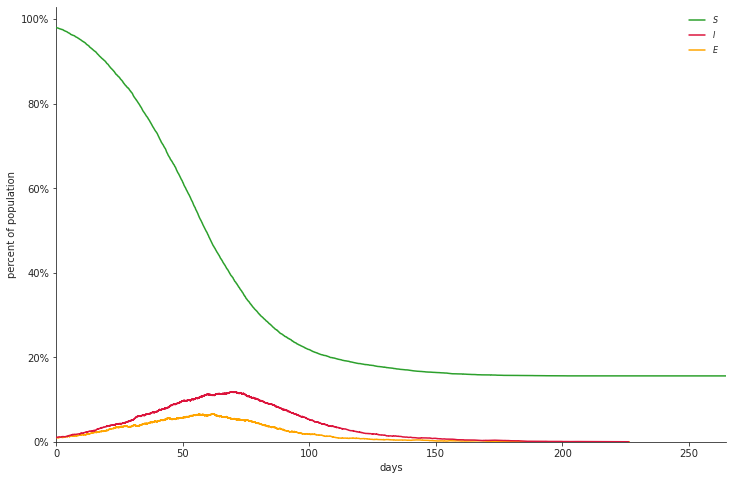

t = 0.00
t = 10.02
t = 20.01
t = 30.01
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.01
t = 100.00
t = 110.00
t = 120.00
t = 130.02
t = 140.02
t = 150.02
t = 160.12
t = 170.25
t = 180.23
t = 190.41


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


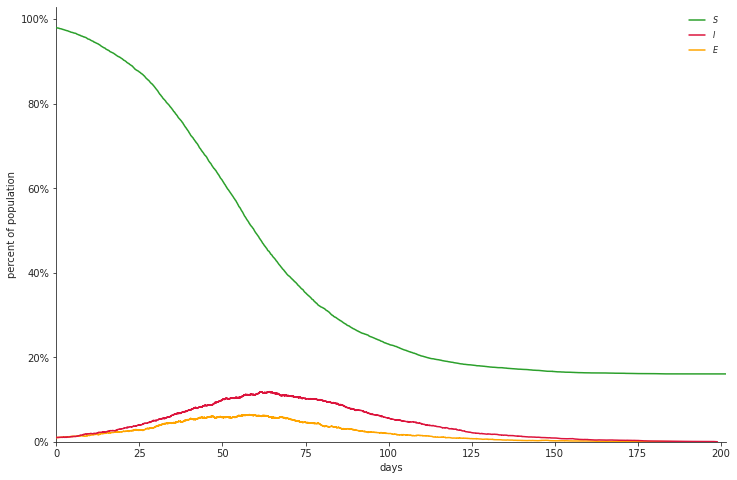

t = 0.04
t = 10.01
t = 20.02
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.01
t = 90.00
t = 100.00
t = 110.02
t = 120.01
t = 130.00
t = 140.07
t = 150.24
t = 160.30
t = 170.50
t = 190.30


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


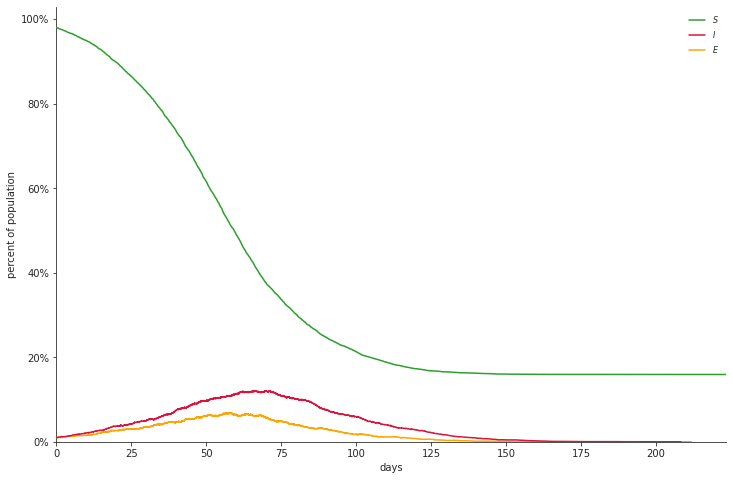

t = 0.01
t = 10.01
t = 20.02
t = 30.01
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.00
t = 100.03
t = 110.00
t = 120.03
t = 130.00
t = 140.12
t = 150.04
t = 160.41
t = 170.10
t = 180.42
t = 190.80
t = 200.35
t = 230.09
t = 260.02
t = 280.29
t = 290.69


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


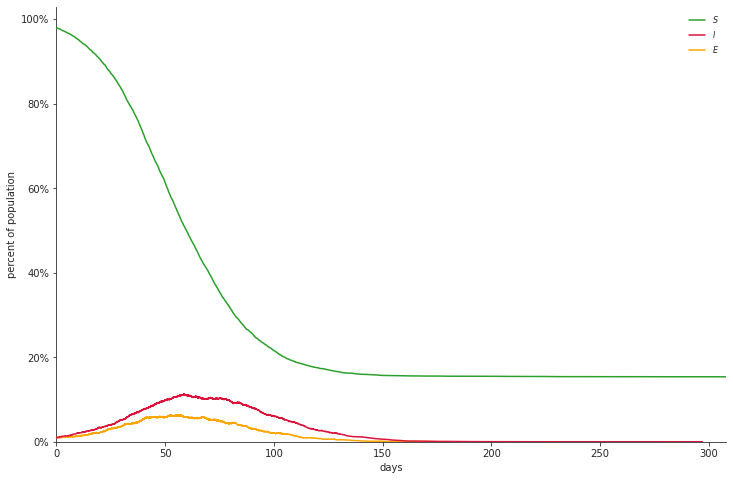

t = 0.01
t = 10.01
t = 20.02
t = 30.01
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.02
t = 100.02
t = 110.00
t = 120.00
t = 130.05
t = 140.08
t = 150.24
t = 170.18
t = 180.23
t = 200.03


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


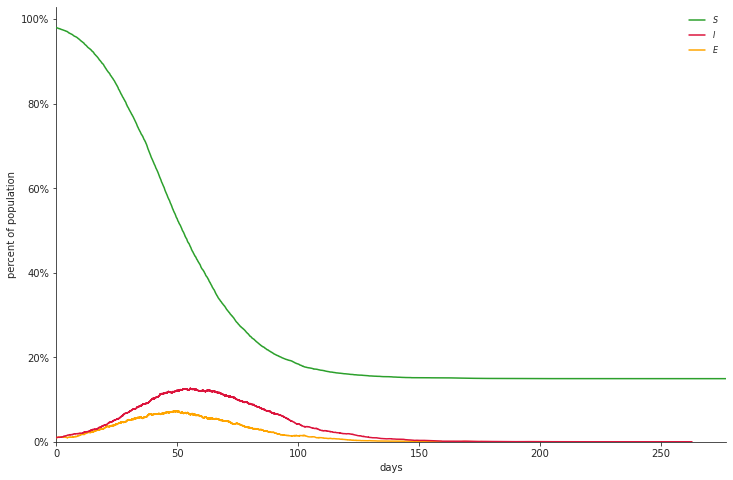

t = 0.02
t = 10.00
t = 20.00
t = 30.00
t = 40.01
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.00
t = 100.00
t = 110.00
t = 120.02
t = 130.00
t = 140.01
t = 150.19
t = 160.15
t = 170.04
t = 180.12
t = 190.90
t = 200.43
t = 220.81


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


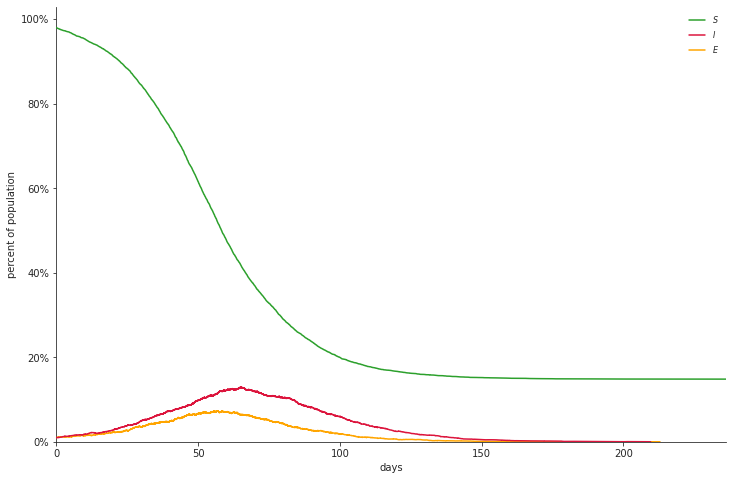

In [16]:
op31 = []
op32= []
op33 =[]
l31=[]
l32=[]
l33=[]
for i in range(10):
    res31,line31 = ipfnB(g31,e=1,i=1)
    res32,line32 = ipfnB(g32,e=1,i=1)
    res33,line33 = ipfnB(g33,e=1,i=1)
    op11.append(res31)
    op12.append(res32)
    op13.append(res33)
    l11.append(line31)
    l12.append(line32)
    l13.append(line33)


In [18]:
graphs = [[g11,g12,g13],[g31,g32,g33]]

In [19]:
import pickle
with open('Final Outputs/Degree_Distribution_Ofir_Loc_Graphs.pkl', 'wb') as outfile:
    pickle.dump(graphs, outfile, pickle.HIGHEST_PROTOCOL)

In [20]:
with open('Final Outputs/Degree_dist_Ofir_Outputs.pkl', 'wb') as outfile:
    pickle.dump([op11,op12,op13,l11,l12,l13], outfile, pickle.HIGHEST_PROTOCOL)

In [21]:
with open('Final Outputs/Degree_dist_Loc_Outputs.pkl', 'wb') as outfile:
    pickle.dump([op31,op32,op33,l31,l32,l33], outfile, pickle.HIGHEST_PROTOCOL)

In [28]:
ld1 = []
ld2= []
ld3= []
for i in range(10000):
    ld1.append(int(deg[i]*0.75))
    ld2.append(int(deg[i]*0.50))
    ld3.append(int(deg[i]*0.25))

In [27]:
g1  = seir.generate_scale_free_graph(10000,min_degree=2,mean_degree=20,gamma=0.2)
g1 = nx.Graph(g12)

deg = g1.degree()

g3=nx.Graph()
g3.add_nodes_from(range(10000))
for i in range(len(data1)):

    dlist=distances[i]
    dlist.sort(key=mykey)
    #print(dlist[:20])
    edgelist=[]
    cntr= 0
    p=1
    while(cntr!=deg[i] and p<10000):
    #for k in range(deg[i]):
        k= dlist[p][1]
        if(g3.degree[k]<deg[k]):
            edgelist.append((i,k))
            cntr=cntr+1
        p=p+1

    g3.add_edges_from(edgelist)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [29]:
deg = ld1

g3_75=nx.Graph()
g3_75.add_nodes_from(range(10000))
for i in range(len(data1)):

    dlist=distances[i]
    dlist.sort(key=mykey)
    #print(dlist[:20])
    edgelist=[]
    cntr= 0
    p=1
    while(cntr!=deg[i] and p<10000):
    #for k in range(deg[i]):
        k= dlist[p][1]
        if(g3_75.degree[k]<deg[k]):
            edgelist.append((i,k))
            cntr=cntr+1
        p=p+1

    g3_75.add_edges_from(edgelist)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [30]:
deg = ld2

g3_50=nx.Graph()
g3_50.add_nodes_from(range(10000))
for i in range(len(data1)):

    dlist=distances[i]
    dlist.sort(key=mykey)
    #print(dlist[:20])
    edgelist=[]
    cntr= 0
    p=1
    while(cntr!=deg[i] and p<10000):
    #for k in range(deg[i]):
        k= dlist[p][1]
        if(g3_50.degree[k]<deg[k]):
            edgelist.append((i,k))
            cntr=cntr+1
        p=p+1

    g3_50.add_edges_from(edgelist)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [31]:
deg = ld3

g3_25=nx.Graph()
g3_25.add_nodes_from(range(10000))
for i in range(len(data1)):

    dlist=distances[i]
    dlist.sort(key=mykey)
    #print(dlist[:20])
    edgelist=[]
    cntr= 0
    p=1
    while(cntr!=deg[i] and p<10000):
    #for k in range(deg[i]):
        k= dlist[p][1]
        if(g3_25.degree[k]<deg[k]):
            edgelist.append((i,k))
            cntr=cntr+1
        p=p+1

    g3_25.add_edges_from(edgelist)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [51]:
graphs = [g3,g3_75,g3_50,g3_25]

In [52]:
import pickle
with open('Final Outputs/Lockdown_Loc_Graphs.pkl', 'wb') as outfile:
    pickle.dump(graphs, outfile, pickle.HIGHEST_PROTOCOL)

In [50]:
g1.edges(1)

AttributeError: 'EdgeDataView' object has no attribute 'tolist'

AttributeError: 'EdgeDataView' object has no attribute 'shape'

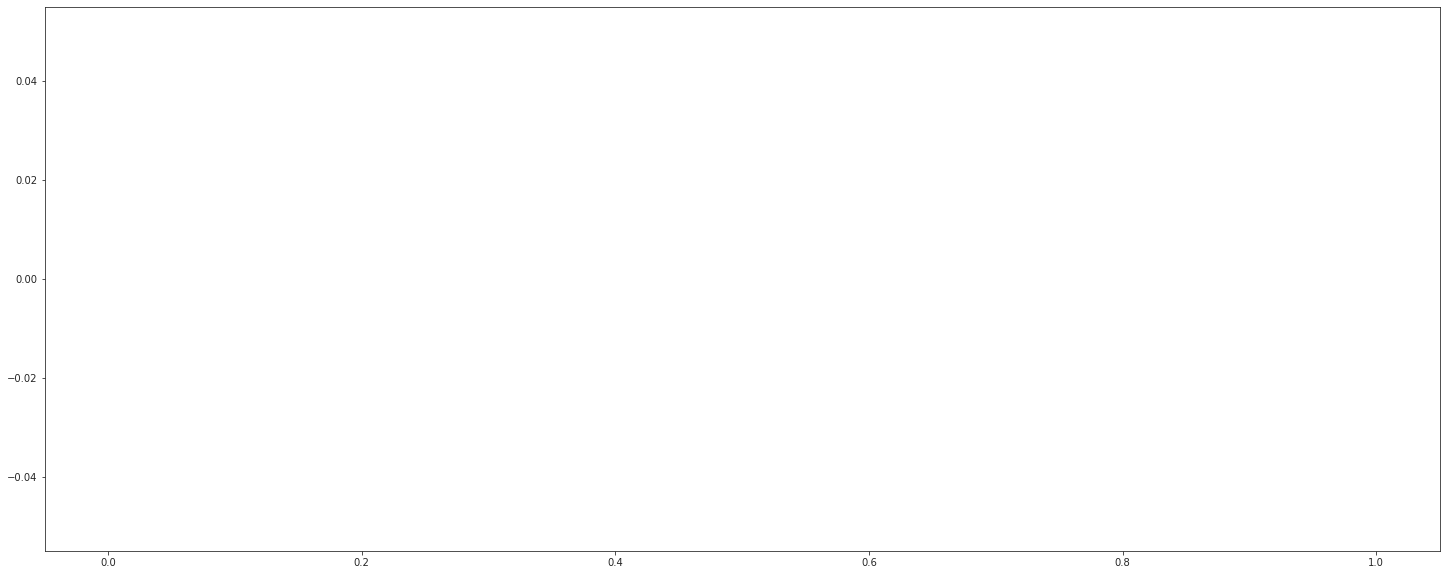

In [18]:
dlist1=[]
for u,v in g4.edges(0):
    diff= calc_euclid(data1[u],data1[v])
    dlist1.append(diff)   

hist2 = plt.hist(dlist1,bins=20)

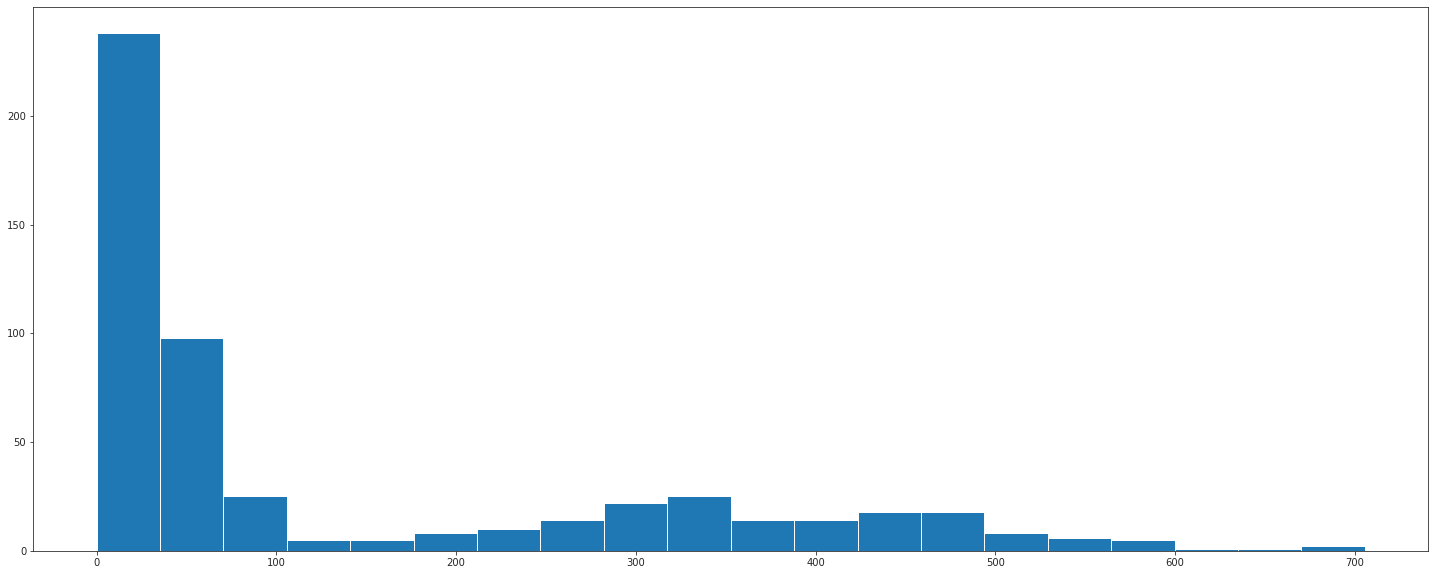

In [23]:
dlist2=[]
for u,v in g2.edges(18):
    diff= calc_euclid(data1[u],data1[v])
    dlist2.append(diff)   

hist2 = plt.hist(dlist2,bins=20)

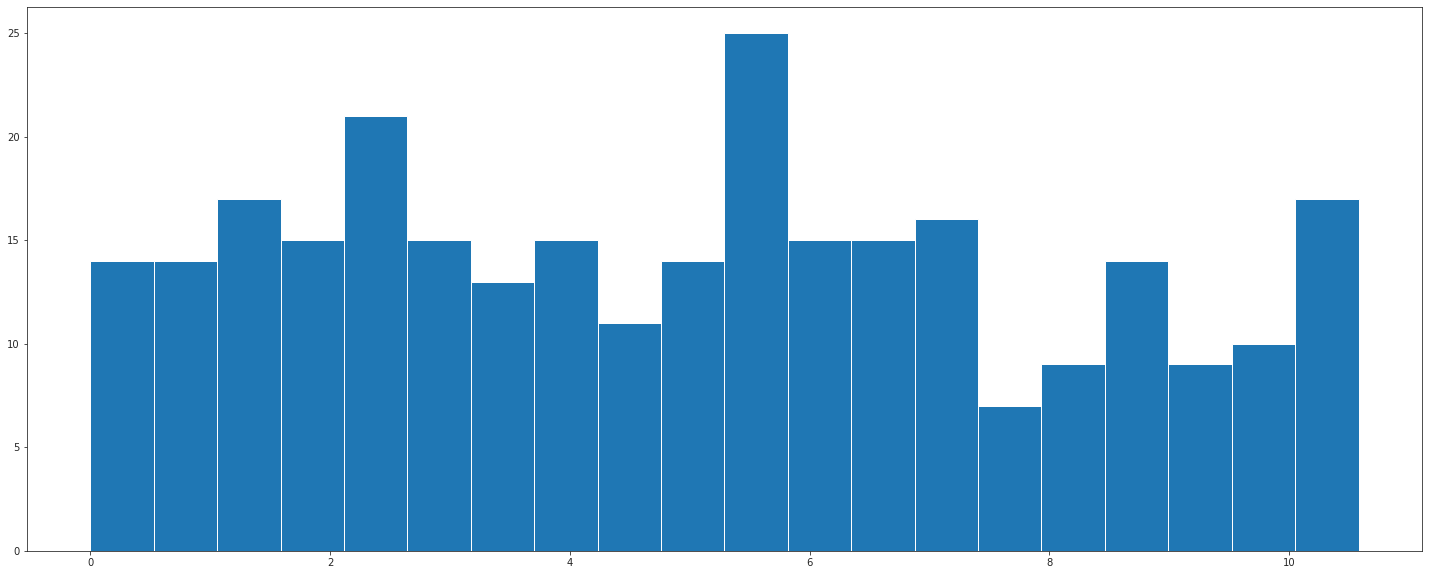

In [24]:
dlist3=[]
for u,v in g3.edges(3665):
    diff= calc_euclid(data1[u],data1[v])
    dlist3.append(diff)   

hist2 = plt.hist(dlist3,bins=20)

In [29]:
dlist_tot =[dlist2,dlist1,dlist3]

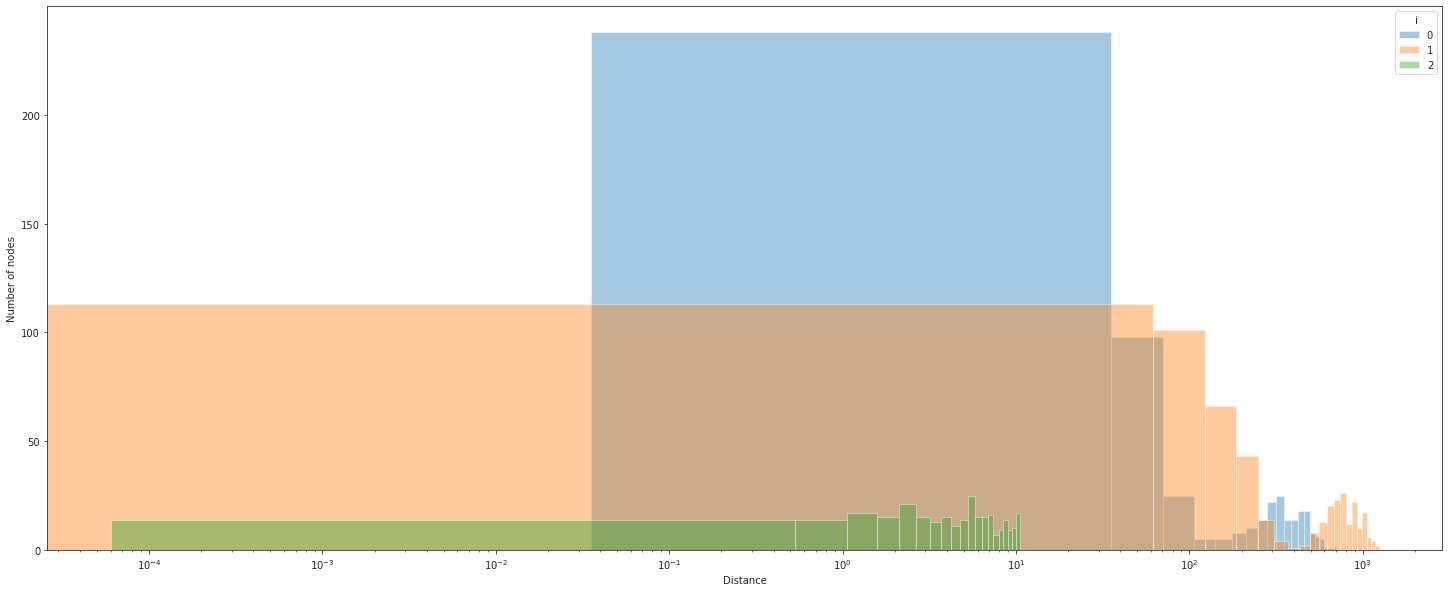

In [34]:
fig, ax = plt.subplots()

for i in range(len(dlist_tot)):
    ax = sns.distplot(dlist_tot[i], kde=False, label=i, ax=ax,bins=20)
ax.set_xlabel('Distance')
ax.set_ylabel('Number of nodes')
ax.legend(title='i')
ax.set_xscale('log')


t = 0.04
t = 10.00
t = 20.01
t = 30.01
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.01
t = 100.01
t = 110.00
t = 120.01
t = 130.00
t = 140.25
t = 150.88
t = 160.19
t = 170.30
t = 180.09
t = 190.07


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


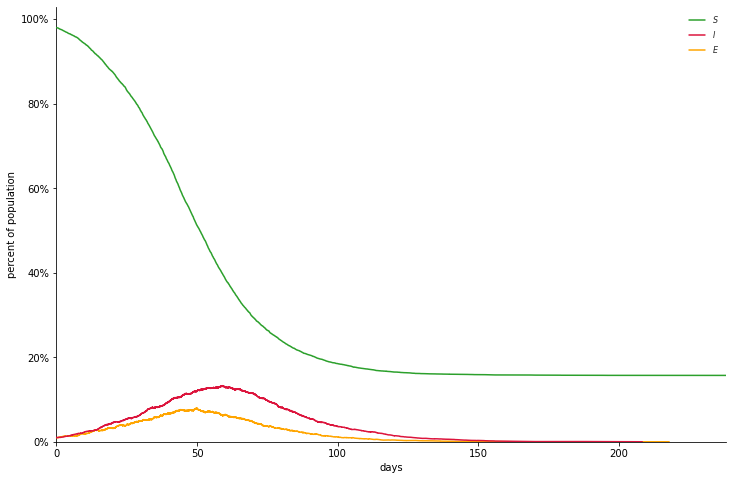

t = 0.01
t = 10.00
t = 20.00
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.00
t = 100.03
t = 110.05
t = 120.05
t = 130.02
t = 140.34
t = 150.11
t = 160.01
t = 170.19


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


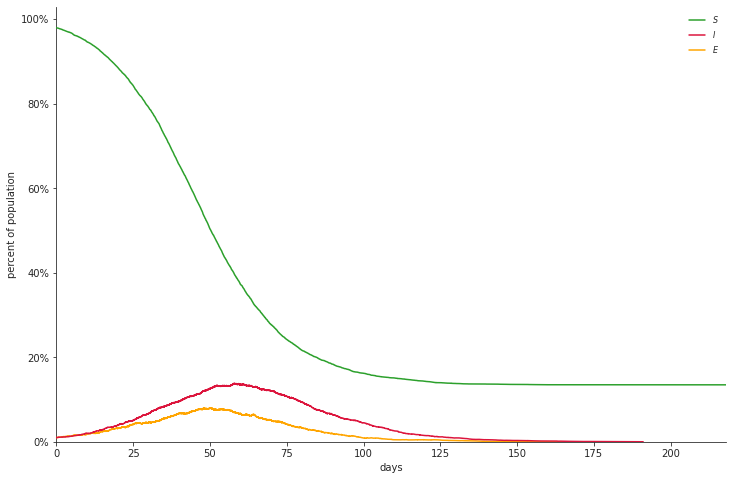

t = 0.01
t = 10.01
t = 20.00
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.00
t = 100.00
t = 110.01
t = 120.01
t = 130.00
t = 140.01
t = 150.02
t = 160.05
t = 170.04
t = 180.02
t = 190.24
t = 200.42
t = 230.03
t = 240.23
t = 260.35
t = 280.49
t = 290.84


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


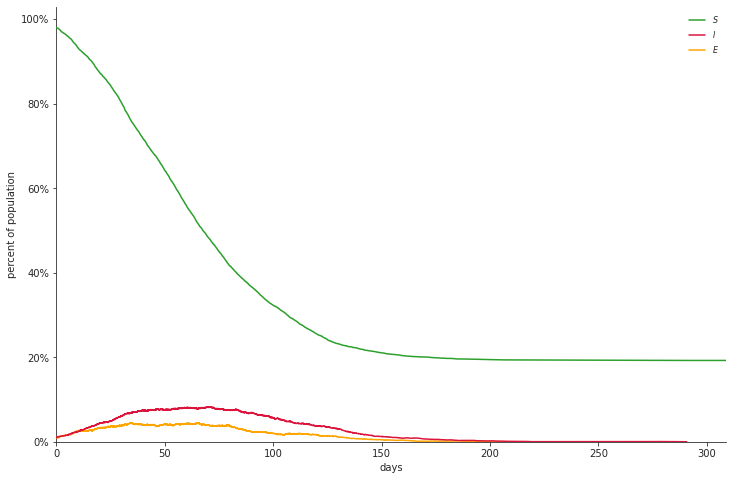

t = 0.02
t = 10.01
t = 20.01
t = 30.01
t = 40.00
t = 50.01
t = 60.00
t = 70.00
t = 80.01
t = 90.00
t = 100.00
t = 110.00
t = 120.04
t = 130.04
t = 140.03
t = 150.04
t = 160.80
t = 170.26
t = 180.05


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


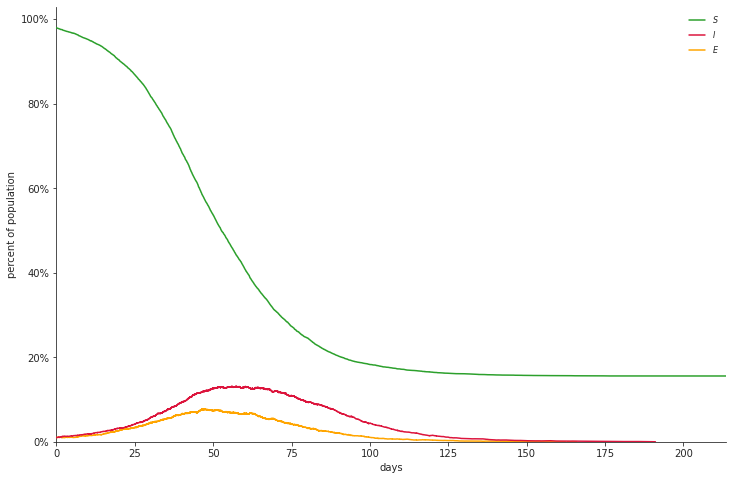

t = 0.00
t = 10.02
t = 20.01
t = 30.00
t = 40.00
t = 50.00
t = 60.01
t = 70.00
t = 80.00
t = 90.01
t = 100.01
t = 110.04
t = 120.00
t = 130.01
t = 140.11
t = 150.10
t = 160.05
t = 170.39
t = 180.25
t = 200.00
t = 210.76


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


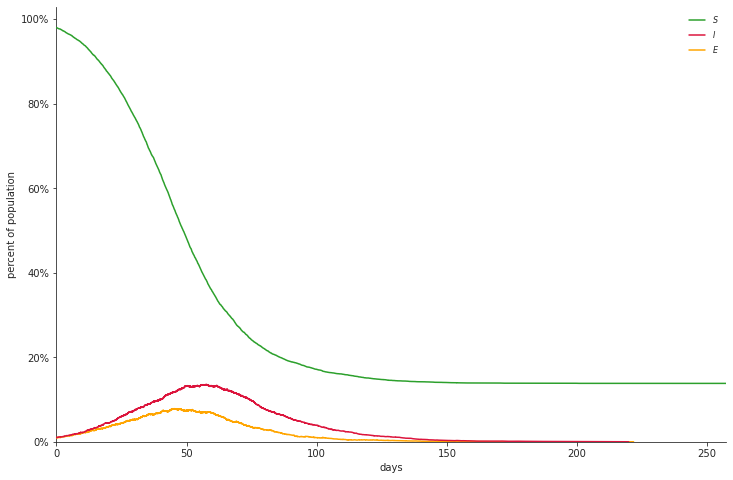

t = 0.00
t = 10.02
t = 20.01
t = 30.00
t = 40.00
t = 50.01
t = 60.00
t = 70.00
t = 80.00
t = 90.00
t = 100.00
t = 110.00
t = 120.03
t = 130.01
t = 140.05
t = 150.05
t = 160.01
t = 170.01
t = 180.06
t = 190.01
t = 200.30
t = 210.07
t = 220.01
t = 230.04
t = 240.14
t = 250.01
t = 260.25


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


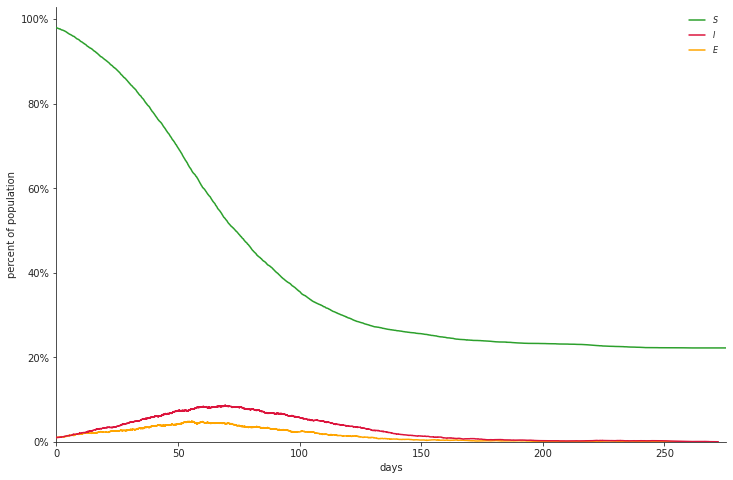

t = 0.01
t = 10.00
t = 20.00
t = 30.00
t = 40.00
t = 50.01
t = 60.00
t = 70.02
t = 80.00
t = 90.01
t = 100.01
t = 110.01
t = 120.00
t = 130.11
t = 140.01
t = 150.21
t = 160.29
t = 180.16


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


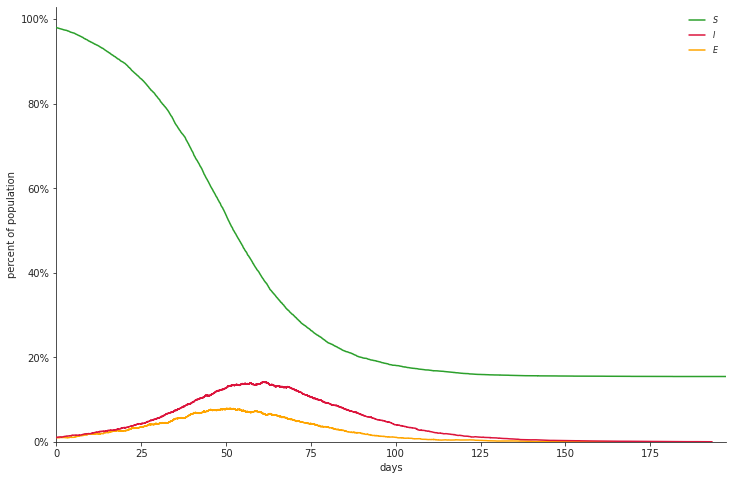

t = 0.00
t = 10.00
t = 20.00
t = 30.00
t = 40.00
t = 50.01
t = 60.00
t = 70.01
t = 80.00
t = 90.00
t = 100.01
t = 110.01
t = 120.01
t = 130.06
t = 140.63
t = 150.01
t = 160.37
t = 170.24
t = 180.71


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


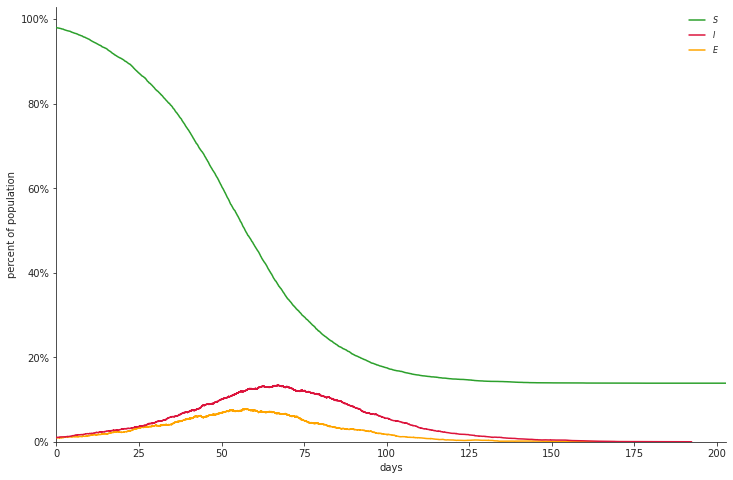

t = 0.06
t = 10.01
t = 20.00
t = 30.01
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.00
t = 100.01
t = 110.00
t = 120.01
t = 130.02
t = 140.01
t = 150.09
t = 160.06
t = 170.00
t = 180.03
t = 190.10
t = 200.13
t = 210.23
t = 220.58
t = 230.22
t = 240.25
t = 250.04
t = 260.01
t = 270.65


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


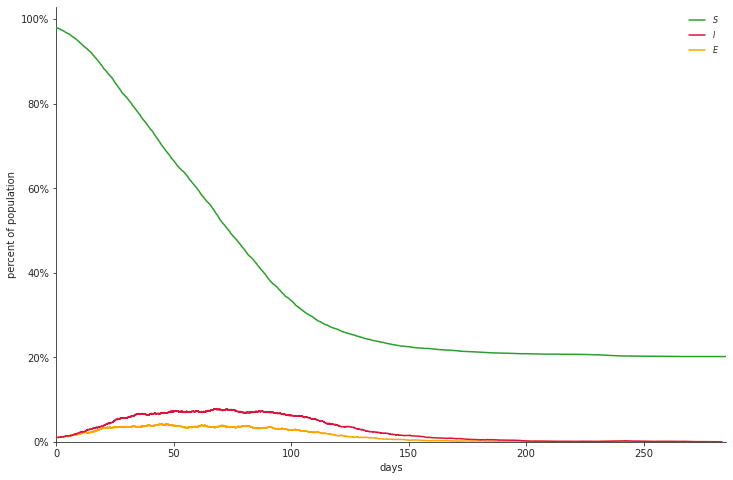

t = 0.01
t = 10.00
t = 20.00
t = 30.01
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.02
t = 100.02
t = 110.07
t = 120.00
t = 130.02
t = 140.02
t = 150.00
t = 160.20
t = 200.69


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


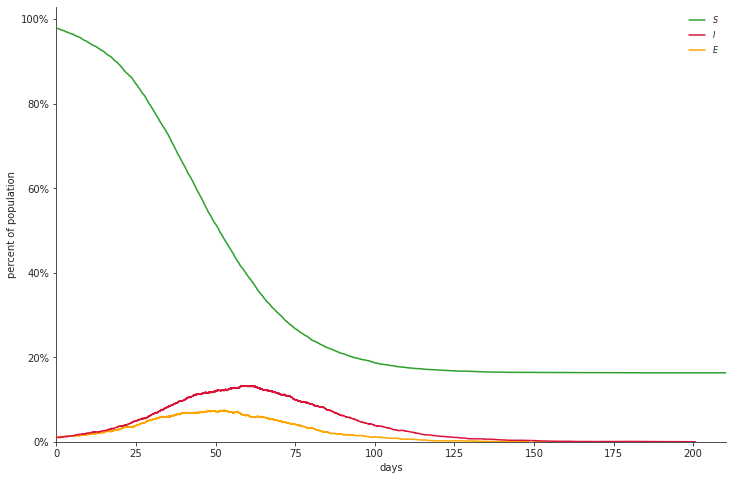

t = 0.01
t = 10.01
t = 20.00
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.01
t = 80.00
t = 90.00
t = 100.00
t = 110.01
t = 120.07
t = 130.06
t = 140.08
t = 150.03
t = 160.18
t = 170.06
t = 180.06
t = 190.07
t = 200.57
t = 210.09


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


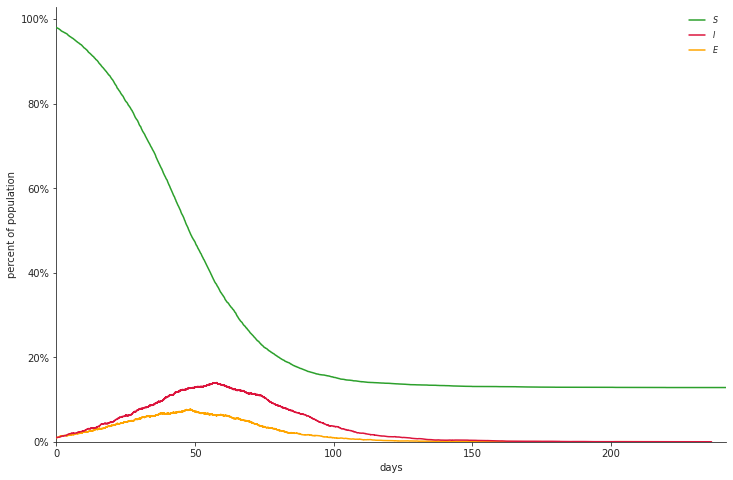

t = 0.00
t = 10.03
t = 20.01
t = 30.00
t = 40.00
t = 50.01
t = 60.00
t = 70.00
t = 80.01
t = 90.00
t = 100.00
t = 110.00
t = 120.00
t = 130.00
t = 140.00
t = 150.01
t = 160.01
t = 170.04
t = 180.01
t = 190.04
t = 200.43
t = 210.02
t = 220.09
t = 230.76
t = 240.57


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


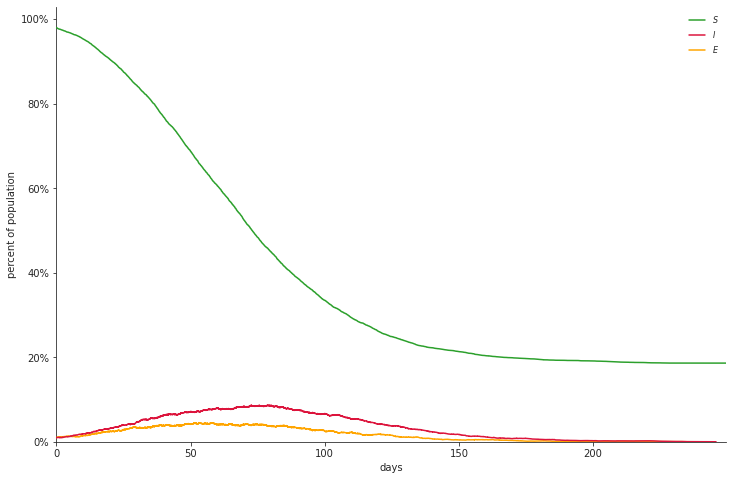

t = 0.01
t = 10.02
t = 20.00
t = 30.00
t = 40.00
t = 50.00
t = 60.01
t = 70.01
t = 80.00
t = 90.02
t = 100.00
t = 110.00
t = 120.02
t = 130.04
t = 140.01
t = 150.16
t = 160.67
t = 170.05
t = 180.85


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


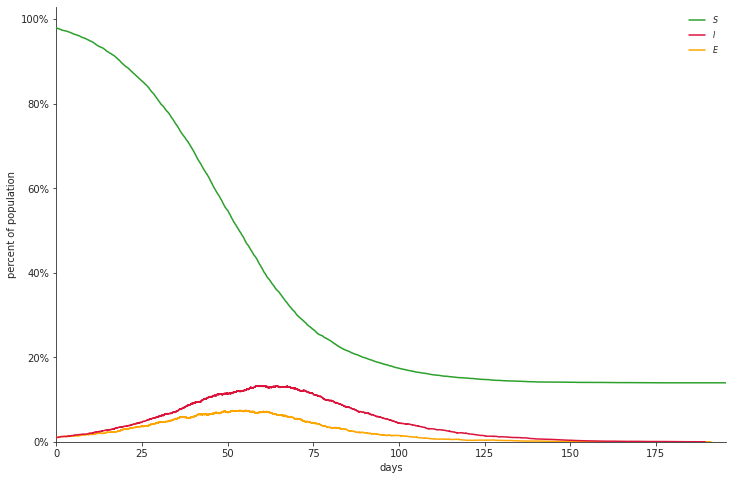

t = 0.01
t = 10.01
t = 20.01
t = 30.00
t = 40.00
t = 50.01
t = 60.00
t = 70.01
t = 80.00
t = 90.00
t = 100.02
t = 110.01
t = 120.07
t = 130.08
t = 140.14
t = 150.09
t = 160.17
t = 170.54
t = 180.62
t = 220.05


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


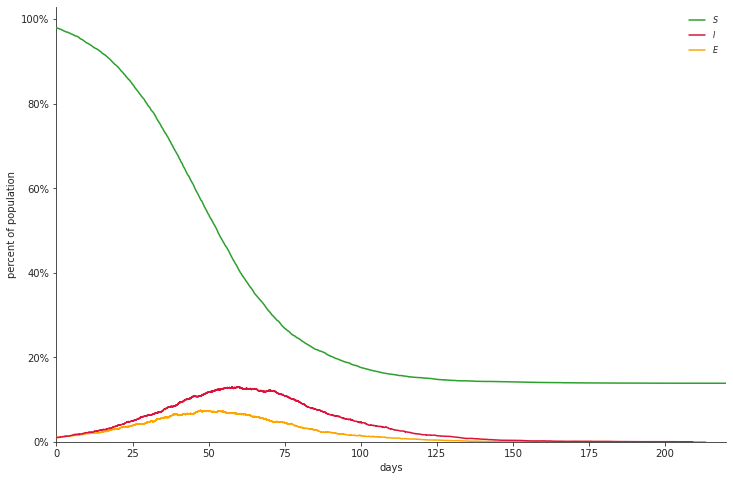

t = 0.01
t = 10.00
t = 20.01
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.02
t = 100.01
t = 110.00
t = 120.00
t = 130.00
t = 140.10
t = 150.01
t = 160.03
t = 170.05
t = 180.02
t = 190.17
t = 200.03
t = 210.53
t = 220.04
t = 230.08
t = 240.09
t = 250.53


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


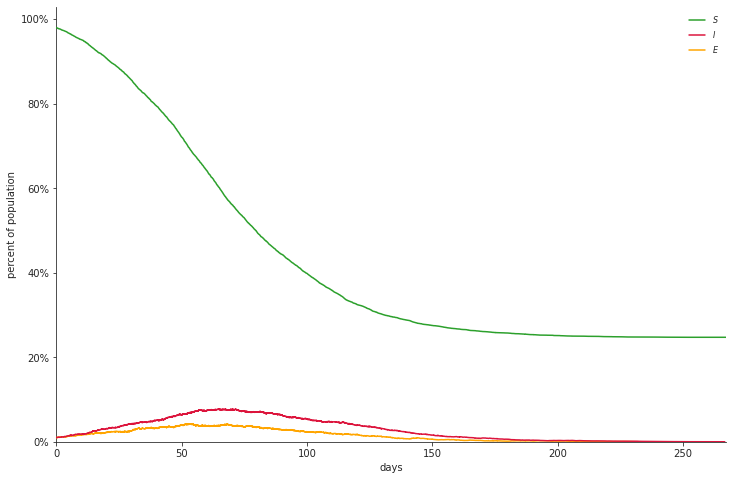

t = 0.00
t = 10.02
t = 20.00
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.00
t = 100.00
t = 110.02
t = 120.01
t = 130.02
t = 140.12
t = 150.32
t = 160.07
t = 170.73
t = 180.02


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


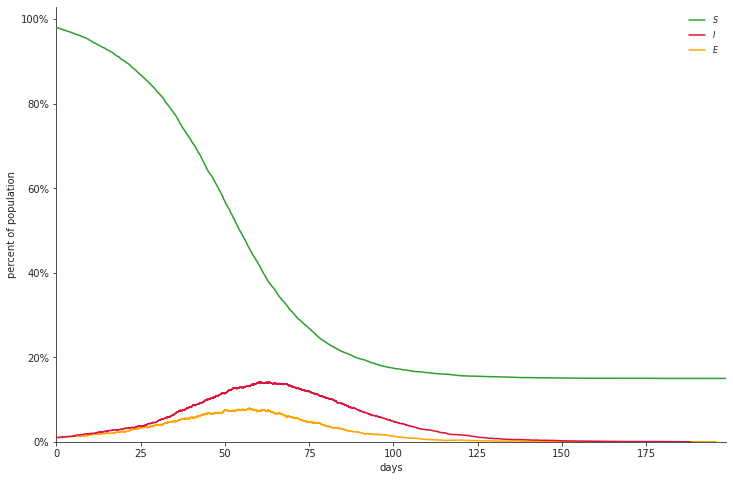

t = 0.03
t = 10.00
t = 20.00
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.00
t = 100.01
t = 110.03
t = 120.00
t = 130.14
t = 140.03
t = 150.11
t = 160.41
t = 170.38
t = 180.27
t = 210.82


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


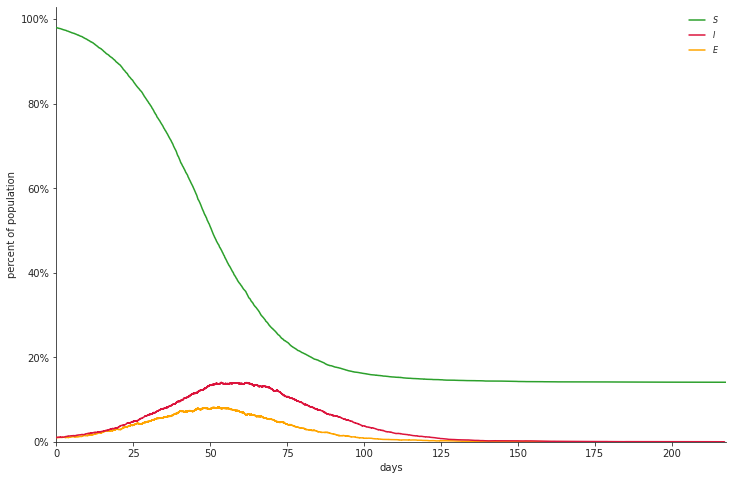

t = 0.01
t = 10.01
t = 20.00
t = 30.00
t = 40.01
t = 50.01
t = 60.00
t = 70.00
t = 80.00
t = 90.00
t = 100.00
t = 110.00
t = 120.03
t = 130.00
t = 140.02
t = 150.02
t = 160.05
t = 170.01
t = 180.16
t = 190.02
t = 200.44
t = 210.09
t = 220.33
t = 230.23
t = 240.01
t = 250.25
t = 270.73


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


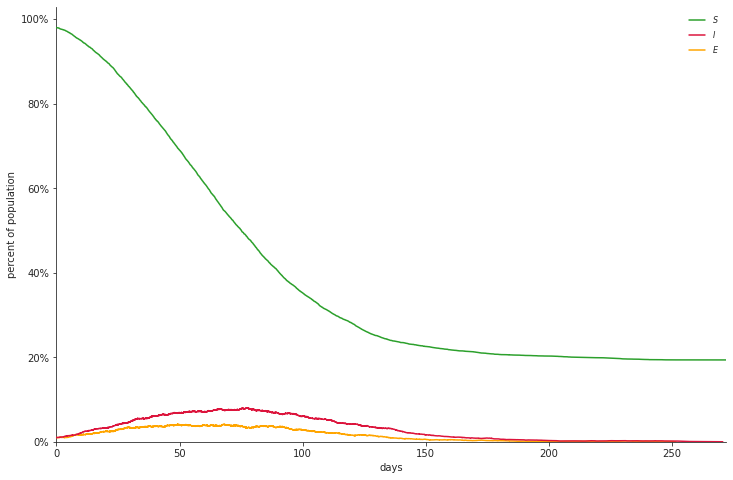

t = 0.00
t = 10.01
t = 20.01
t = 30.00
t = 40.01
t = 50.00
t = 60.01
t = 70.00
t = 80.00
t = 90.01
t = 100.01
t = 110.02
t = 120.08
t = 130.02
t = 140.05
t = 150.09
t = 160.17
t = 170.24
t = 180.36
t = 190.36


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


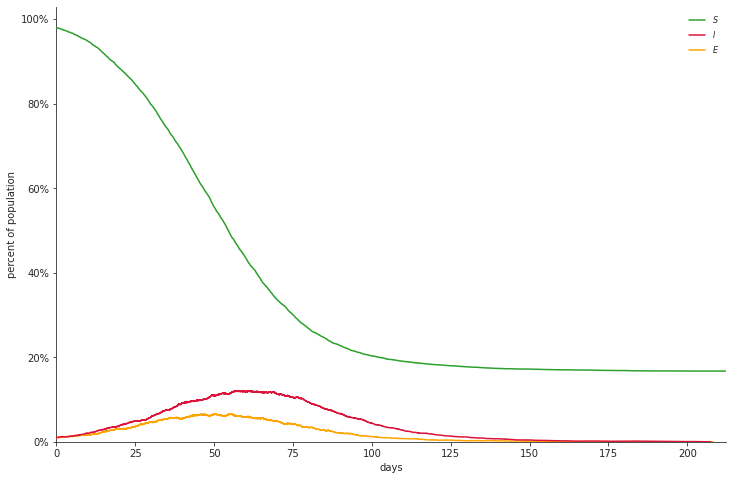

t = 0.02
t = 10.00
t = 20.00
t = 30.01
t = 40.01
t = 50.00
t = 60.00
t = 70.01
t = 80.00
t = 90.01
t = 100.01
t = 110.02
t = 120.00
t = 130.09
t = 140.04
t = 150.06
t = 160.20
t = 170.28
t = 180.26
t = 190.80


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


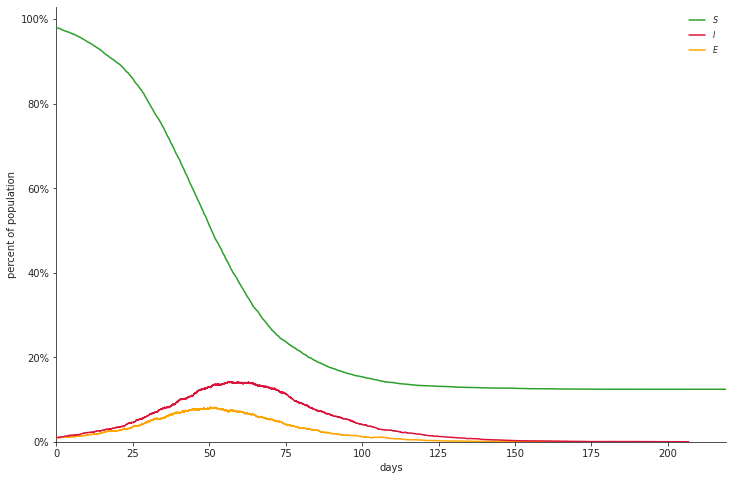

t = 0.02
t = 10.00
t = 20.01
t = 30.00
t = 40.00
t = 50.01
t = 60.00
t = 70.01
t = 80.00
t = 90.00
t = 100.00
t = 110.00
t = 120.00
t = 130.02
t = 140.01
t = 150.17
t = 160.01
t = 170.05
t = 180.05
t = 190.10
t = 200.08
t = 210.24
t = 220.38
t = 230.01
t = 250.35


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


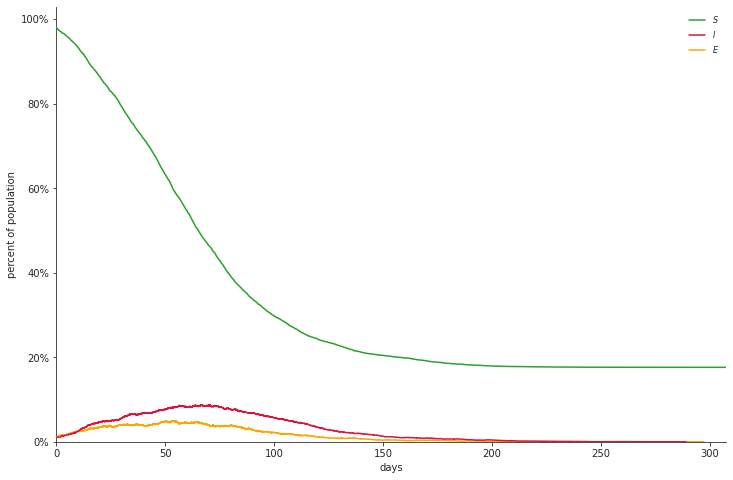

t = 0.00
t = 10.01
t = 20.00
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.01
t = 90.01
t = 100.01
t = 110.01
t = 120.00
t = 130.02
t = 140.02
t = 150.17
t = 160.33
t = 170.37


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


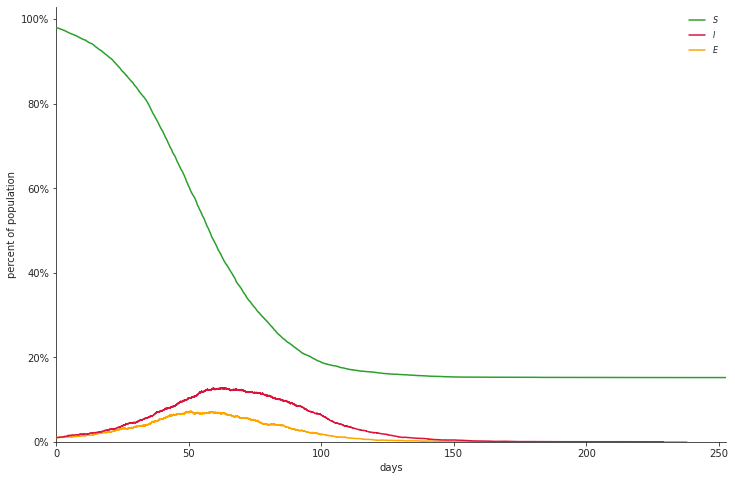

t = 0.04
t = 10.01
t = 20.01
t = 30.01
t = 40.00
t = 50.01
t = 60.01
t = 70.00
t = 80.00
t = 90.01
t = 100.01
t = 110.09
t = 120.03
t = 130.09
t = 140.30
t = 150.13
t = 160.20
t = 180.65
t = 190.02
t = 200.95


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


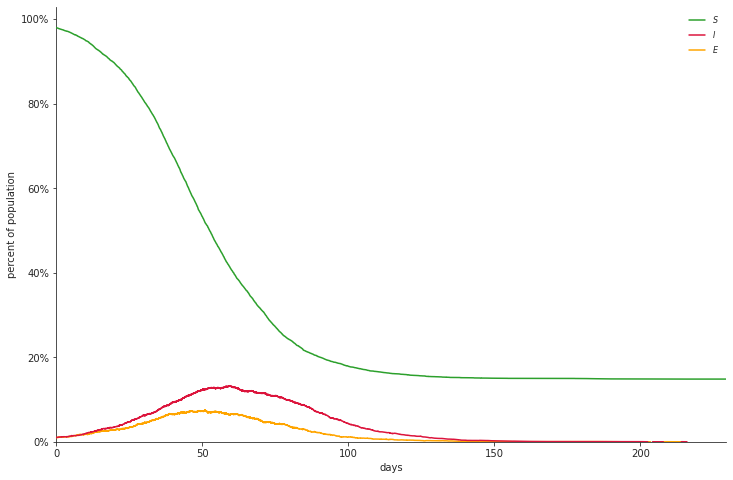

t = 0.03
t = 10.03
t = 20.00
t = 30.03
t = 40.00
t = 50.03
t = 60.01
t = 70.02
t = 80.00
t = 90.02
t = 100.00
t = 110.00
t = 120.00
t = 130.00
t = 140.06
t = 150.00
t = 160.08
t = 170.01
t = 180.16
t = 190.10
t = 200.12
t = 210.01
t = 220.09
t = 230.13
t = 240.76
t = 250.16
t = 260.72
t = 270.07
t = 300.87


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


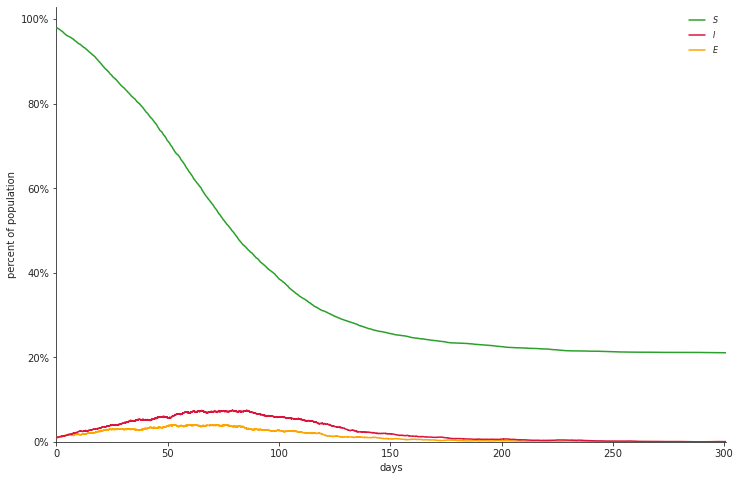

t = 0.02
t = 10.00
t = 20.01
t = 30.01
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.02
t = 100.01
t = 110.01
t = 120.01
t = 130.01
t = 140.27
t = 150.02
t = 160.17
t = 170.53


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


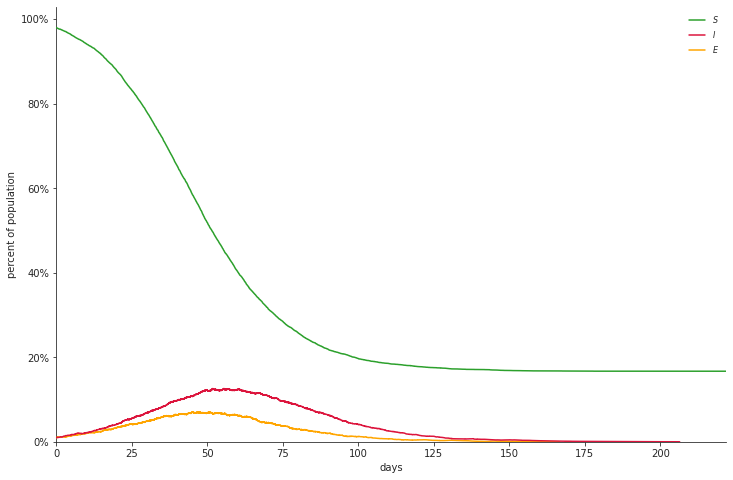

t = 0.01
t = 10.02
t = 20.02
t = 30.01
t = 40.00
t = 50.00
t = 60.01
t = 70.00
t = 80.00
t = 90.00
t = 100.00
t = 110.04
t = 120.03
t = 130.70
t = 140.03
t = 150.04
t = 160.20
t = 170.55
t = 180.08


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


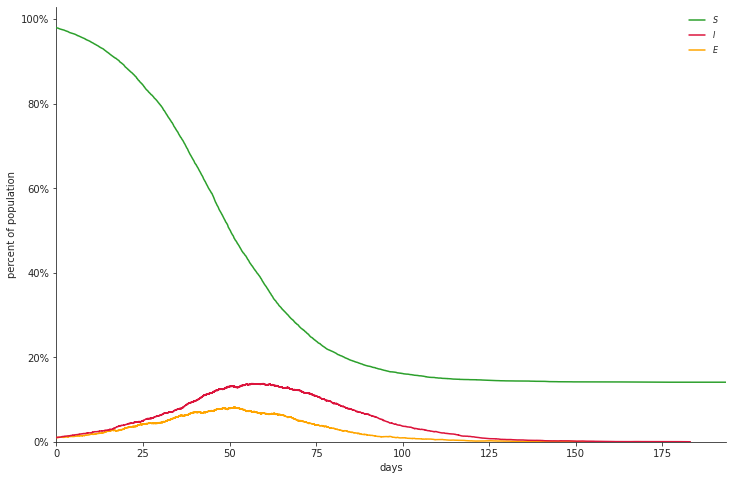

t = 0.08
t = 10.01
t = 20.00
t = 30.04
t = 40.01
t = 50.00
t = 60.00
t = 70.00
t = 80.00
t = 90.03
t = 100.02
t = 110.00
t = 120.01
t = 130.00
t = 140.02
t = 150.00
t = 160.00
t = 170.00
t = 180.04
t = 190.04
t = 200.00
t = 210.03
t = 220.07
t = 230.05
t = 240.06
t = 250.83
t = 260.10
t = 270.13
t = 280.32
t = 290.18
t = 300.25


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


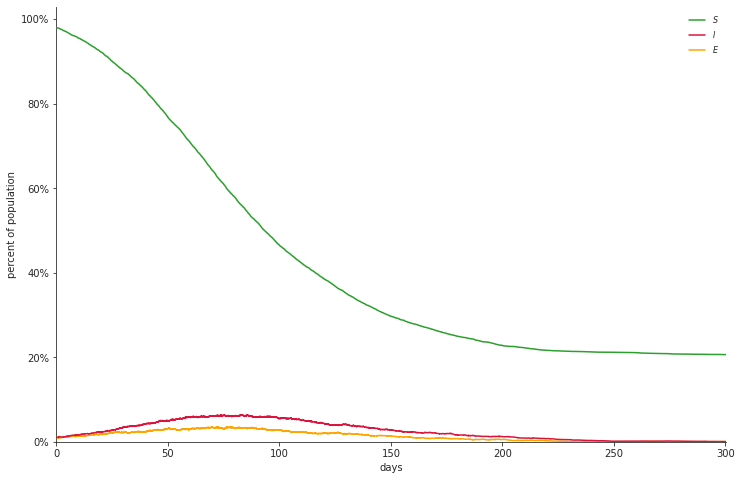

t = 0.07
t = 10.01
t = 20.01
t = 30.00
t = 40.00
t = 50.01
t = 60.00
t = 70.02
t = 80.00
t = 90.00
t = 100.00
t = 110.01
t = 120.03
t = 130.02
t = 140.01
t = 150.03
t = 160.46
t = 170.07
t = 180.02
t = 190.01
t = 200.72


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


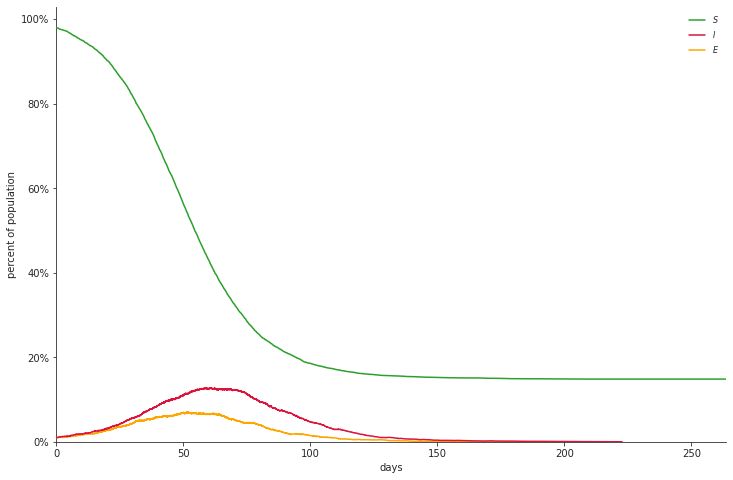

t = 0.00
t = 10.01
t = 20.01
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.00
t = 80.01
t = 90.00
t = 100.02
t = 110.03
t = 120.07
t = 130.29
t = 140.18
t = 150.60
t = 160.08
t = 170.92
t = 180.80
t = 200.02


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


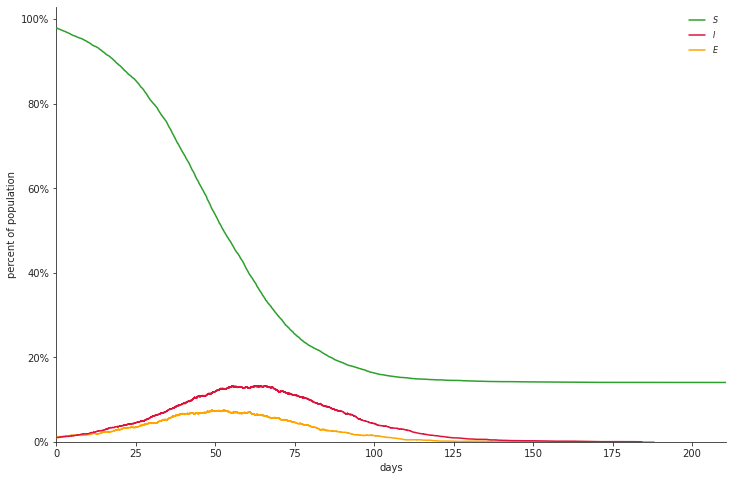

t = 0.01
t = 10.04
t = 20.01
t = 30.00
t = 40.01
t = 50.01
t = 60.00
t = 70.01
t = 80.00
t = 90.01
t = 100.01
t = 110.00
t = 120.00
t = 130.00
t = 140.00
t = 150.00
t = 160.00
t = 170.04
t = 180.03
t = 190.06
t = 200.15
t = 210.00
t = 220.17
t = 230.18
t = 240.05
t = 250.26
t = 260.03
t = 270.12
t = 280.02
t = 300.30


/home/u72216/.local/lib/python3.7/site-packages/seirsplus/models.py:1562: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


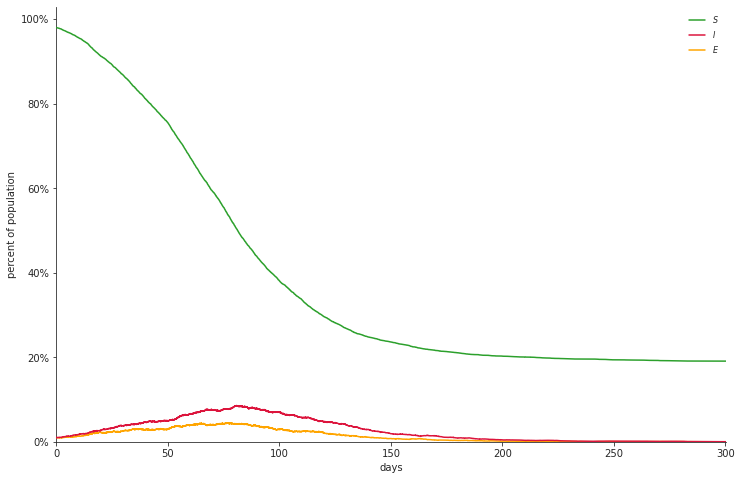

In [14]:
tr1=[]
tr2=[]
tr3=[]
l1=[]
l2=[]
l3=[]
for i in range(10):
    res1,line1 = ipfnB(g1,e=1,i=1)
    res2,line2 = ipfnB(g2,e=1,i=1)
    res3,line3 = ipfnB(g3,e=1,i=1)
    tr1.append(res1)
    tr2.append(res2)
    tr3.append(res3)
    l1.append(line1)
    l2.append(line2)
    l3.append(line3)

In [15]:
import pickle
with open('Final Outputs/Loc_BA_Ofir_Outputs.pkl', 'wb') as outfile:
    pickle.dump([tr1,tr2,tr3,l1,l2,l3], outfile, pickle.HIGHEST_PROTOCOL)

In [2]:
with open('Final Outputs/Loc_BA_Ofir_Outputs.pkl', 'rb') as infile:
    load = pickle.load(infile)

In [3]:
l1= load[3]
l2= load[4]
l3=load[5]

In [9]:
l1[2][0].compressed()

array([0.00000000e+00, 1.36988994e-02, 3.47743609e-02, ...,
       1.88727399e+02, 1.91895951e+02, 1.93200633e+02])

In [8]:
l1[5][0].compressed()

array([0.00000000e+00, 1.04842666e-03, 2.68995476e-02, ...,
       1.86988950e+02, 1.88193263e+02, 1.97217505e+02])

In [43]:
for i in range(10):
    print(len(l1[i][1].compressed()))
    

24986
25029
25065
24801
25511
25202
24677
25139
24690
25248


In [56]:
ltest =l1
Y =[]
for i in range(10):
    if(len(ltest[i][1].compressed())<25511):
        p = ltest[i][1].compressed()
        z= 25511-len(ltest[i][1].compressed())
        p = np.pad(p,(0,z),mode='constant',constant_values=0)
        Y.append(p)
    else:
        Y.append(ltest[i][1].compressed())

In [64]:
col = ['1','2','3','4','5','6','7','8','9','10']
df = pd.DataFrame(data = Y, 
                  columns = ltest[4][0].compressed(),
                     index = index)

In [65]:
df = df.transpose()

In [60]:
df['mean'] = df.mean(axis=1)


In [62]:
#df['X'] = df.index
df = df.reset_index()
df

index       1       2       3       4       5       6       7  \
0        0.000000  0.0100  0.0100  0.0100  0.0100  0.0100  0.0100  0.0100   
1        0.005205  0.0099  0.0100  0.0100  0.0099  0.0101  0.0099  0.0101   
2        0.026176  0.0098  0.0100  0.0099  0.0099  0.0101  0.0099  0.0101   
3        0.026593  0.0099  0.0100  0.0098  0.0099  0.0100  0.0098  0.0100   
4        0.029898  0.0099  0.0101  0.0098  0.0098  0.0099  0.0098  0.0099   
...           ...     ...     ...     ...     ...     ...     ...     ...   
25506  180.851455  0.0000  0.0000  0.0000  0.0000  0.0004  0.0000  0.0000   
25507  181.560896  0.0000  0.0000  0.0000  0.0000  0.0003  0.0000  0.0000   
25508  183.516293  0.0000  0.0000  0.0000  0.0000  0.0002  0.0000  0.0000   
25509  189.385528  0.0000  0.0000  0.0000  0.0000  0.0001  0.0000  0.0000   
25510  194.556407  0.0000  0.0000  0.0000  0.0000  0.0001  0.0000  0.0000   

            8       9      10     mean  
0      0.0100  0.0100  0.0100  0.01000  
1      0.0100  0.0100  0.0101  0.01000  
2      0.0100  0.0100  0.0101  0.00998  
3      0.0100  0.0099  0.0101  0.00994  
4      0.0101  0.0099  0.0102  0.00994  
...       ...     ...     ...      ...  
25506  0.0000  0.0000  0.0000  0.00004  
25507  0.0000  0.0000  0.0000  0.00003  
25508  0.0000  0.0000  0.0000  0.00002  
25509  0.0000  0.0000  0.0000  0.00001  
25510  0.0000  0.0000  0.0000  0.00001  

[25511 rows x 12 columns]

In [49]:
v = ltest[4][0].compressed()


In [52]:
temp = pd.melt(df, id_vars='index', value_vars=v)

In [53]:
temp

index    variable  value
0          1         0.0   0.01
1          2         0.0   0.01
2          3         0.0   0.01
3          4         0.0   0.01
4          5         0.0   0.01
...      ...         ...    ...
255105     6  194.556407   0.00
255106     7  194.556407   0.00
255107     8  194.556407   0.00
255108     9  194.556407   0.00
255109    10  194.556407   0.00

[255110 rows x 3 columns]

<AxesSubplot:>

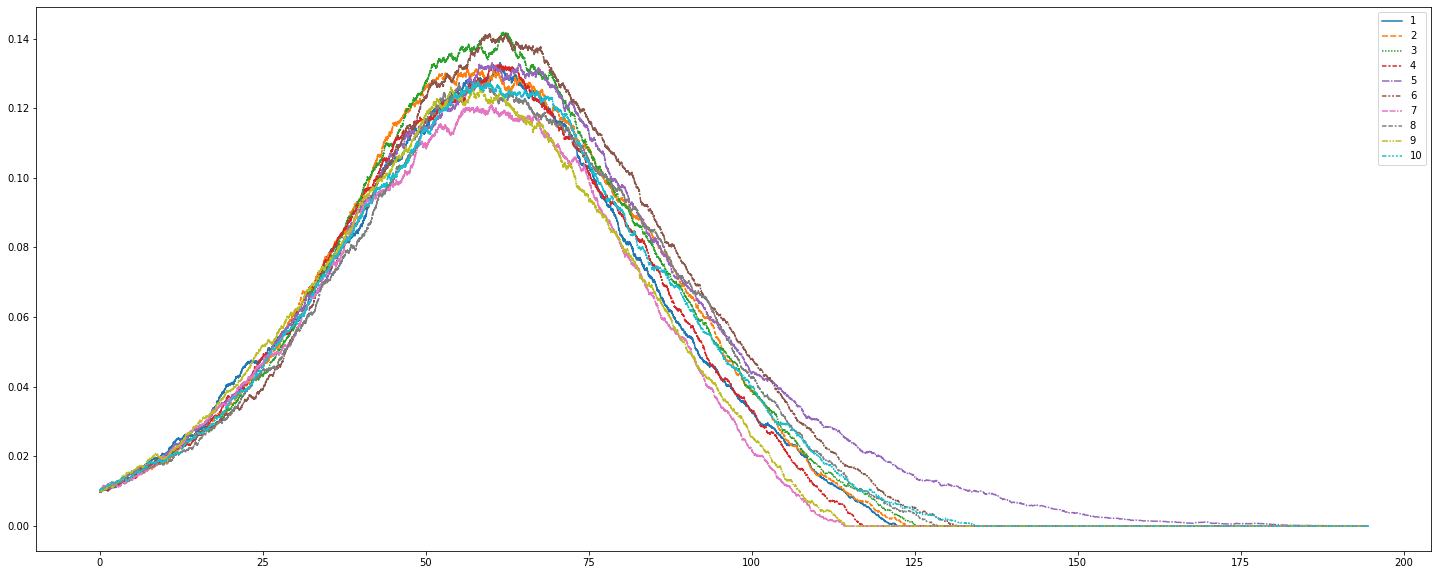

In [67]:
sns.lineplot(data=df, ci=0.95 )
